## Machine Learning Deployment for Regression

### The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of all columns
* Basic Data exploration
* Rejecting useless columns
* Creating new columns
* Doing some experiments on different categorical columns with string value
* Visual Exploratory Data Analysis (Univariate Analysis & Bivariate Analysis)
* Outlier treatment
* Missing Values treatment
* Skewed Value treatement (**Logtransfrom, Square Transform, Reciprocal Transfrom**)

## Data description
The business meaning of each column in the data is as below

* <b>Price</b>: The Price of the car in dollars
* <b>Age</b>: The age of the car in months
* <b>KM</b>: How many KMS did the car was used
* <b>FuelType</b>: Petrol/Diesel/CNG car
* <b>HP</b>: Horse power of the car
* <b>MetColor</b>: Whether car has metallic color or not
* <b>Automatic</b>: Whether car has automatic transmission or not
* <b>CC</b>: The engine size of the car
* <b>Doors</b>: The number of doors in the car
* <b>Weight</b>: The weight of the car

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df = pd.read_csv('CarPricesData.csv', encoding = 'latin')

In [228]:
print('The shape before deleting duplicates: ',df.shape)

The shape before deleting duplicates:  (1436, 10)


In [229]:
df = df.drop_duplicates()

In [230]:
print('The shape after deleting duplicates: ',df.shape)

The shape after deleting duplicates:  (1435, 10)


In [231]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [233]:
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [234]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
mean,10720.915679,56.020237,68571.782578,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


### Checking the numerical column

In [235]:
numcol = df.select_dtypes(include = ['int', 'float']).columns
numcol

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')

In [236]:
df[numcol].nunique()

Price         236
Age            77
KM           1263
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

### Categorical Numerical Column

In [99]:
CategoricalNumcol = []

for i in numcol:
    if df[i].nunique() <= 12:
        CategoricalNumcol.append(i)
print(CategoricalNumcol)    

['HP', 'MetColor', 'Automatic', 'CC', 'Doors']


### Continuous Column

In [98]:
Continuouscol = []

for i in numcol:
    if df[i].nunique()> 12:
        Continuouscol.append(i)
print(Continuouscol)    

['Price', 'Age', 'KM', 'Weight']


## EDA Analysis

### Univariate Analysis

### KDE Plot for Continuous Columns

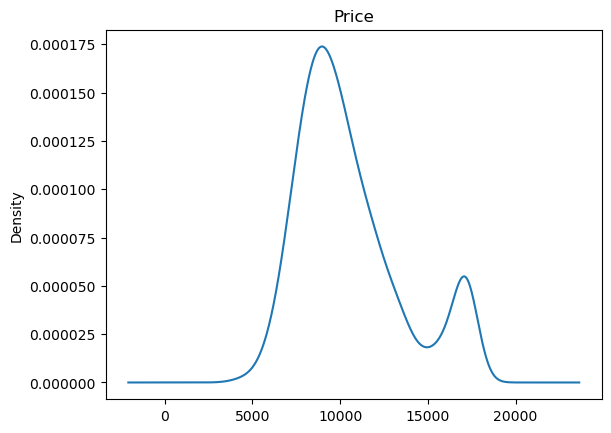

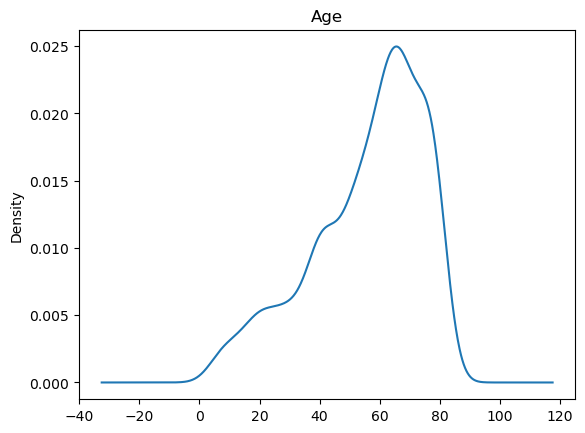

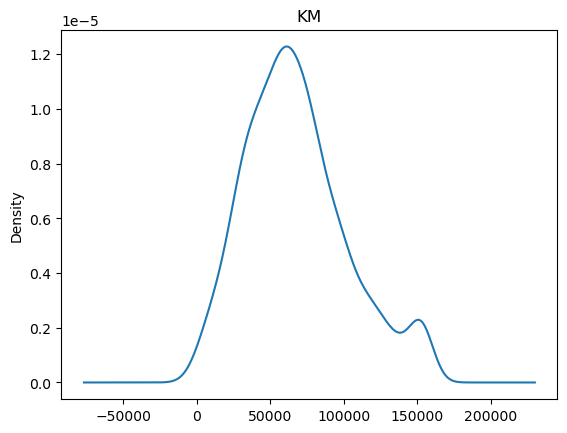

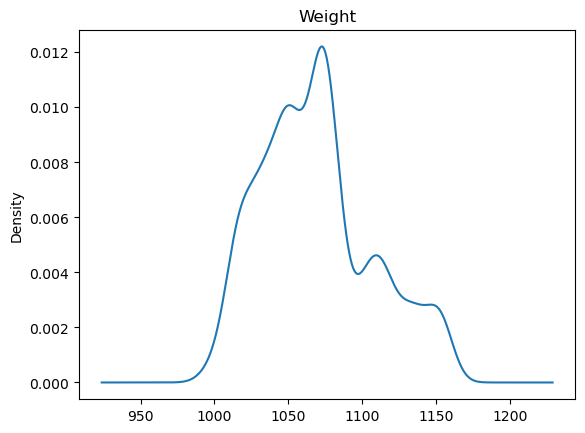

In [100]:
for i in Continuouscol:
    plt.figure(i)
    df[i].plot(kind = 'kde')
    plt.title(i)

### Box Plot

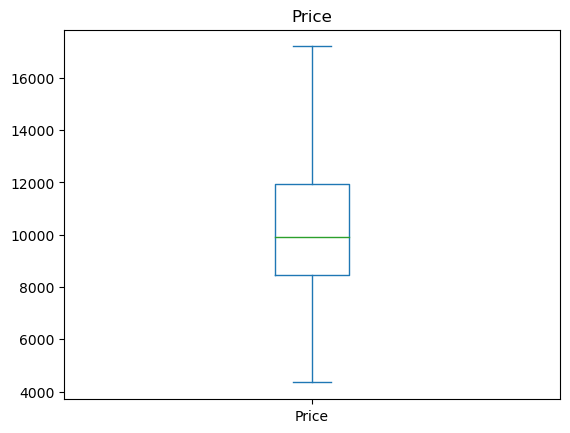

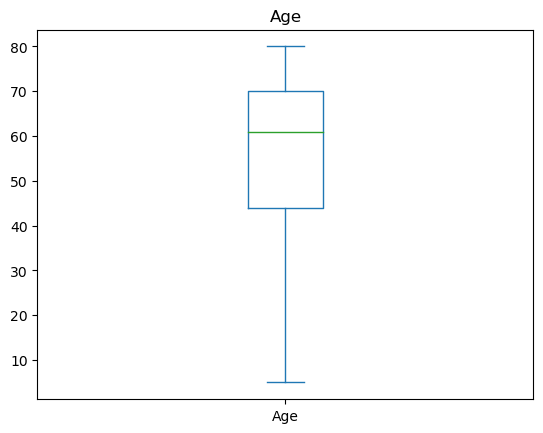

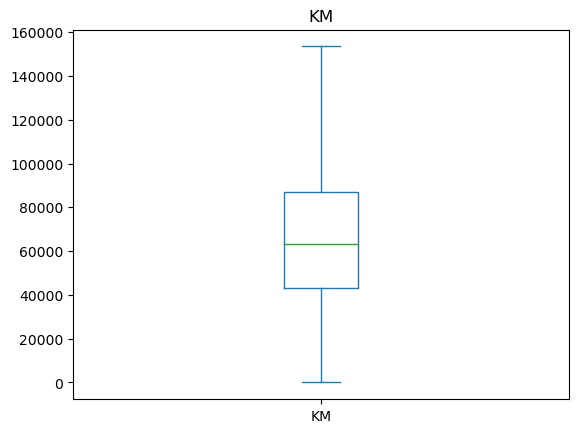

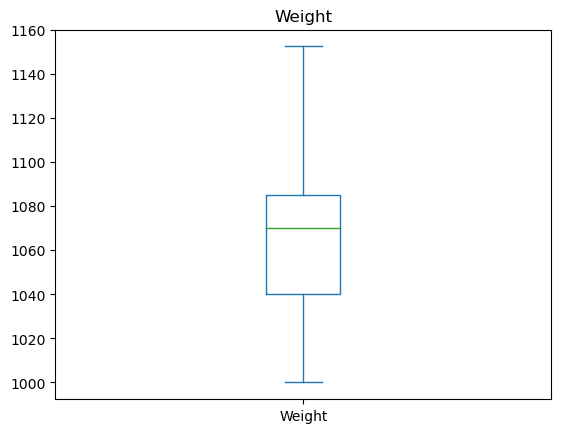

In [101]:
for i in Continuouscol:
    plt.figure(i)
    df[i].plot(kind = 'box')
    plt.title(i)

## Histogram Plot

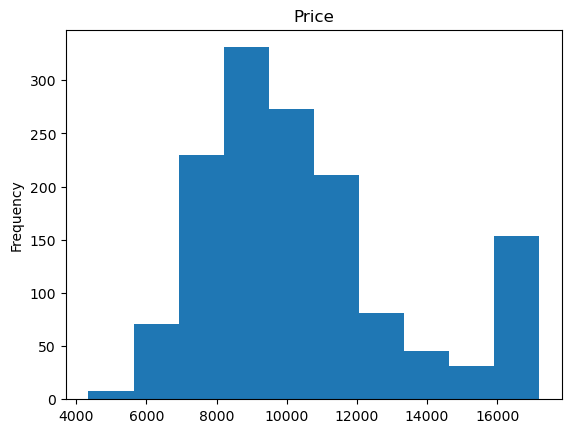

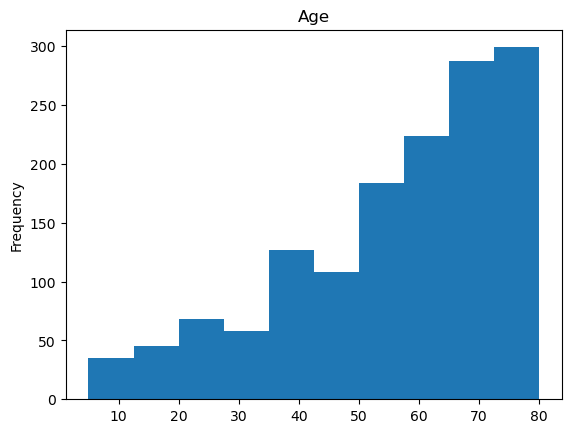

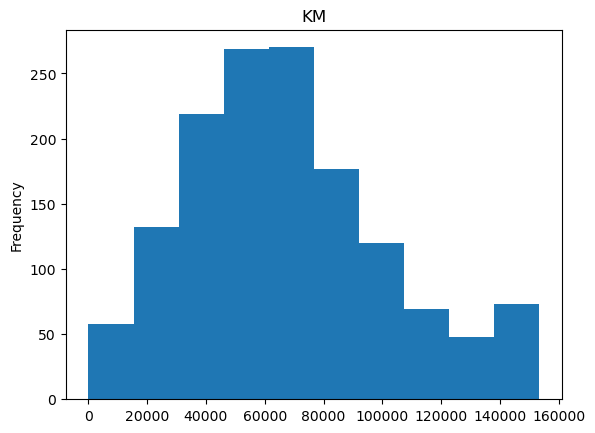

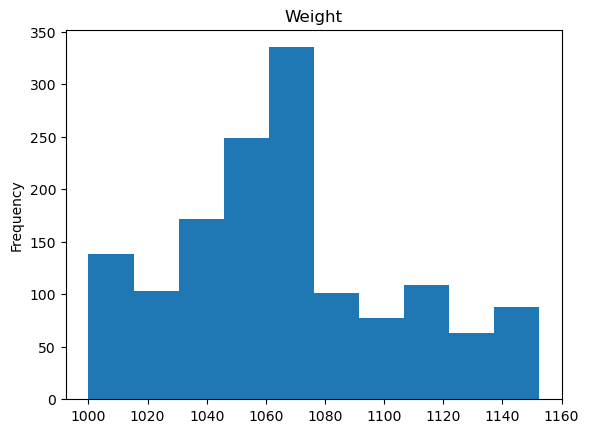

In [102]:
for i in Continuouscol:
    plt.figure(i)
    df[i].plot(kind = 'hist')
    plt.title(i)

In [103]:
for i in Continuouscol:
    print('The skewness of {} is:- {} '.format(i, df[i].skew()))

The skewness of Price is:- 0.9193292533286169 
The skewness of Age is:- -0.8165524165040785 
The skewness of KM is:- 0.5864069503368706 
The skewness of Weight is:- 0.5152718250857347 


In [106]:
df[Continuouscol].describe()

,Price,Age,KM,Weight
count,1435.0,1435.0,1435.00,1435.0
unique,190.0,75.0,1218.00,41.0
top,17200.0,68.0,153446.25,1075.0
freq,110.0,69.0,49.00,192.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
categorical = ['FuelType','HP','MetColor', 'Automatic','CC','Doors']

## Univariate Analysis for Categorical Columns

In [15]:
for i in categorical:
    print(i)
    count = df[i].value_counts()
    print(count)
    print()

FuelType
Petrol    1260
Diesel     154
CNG         17
Name: FuelType, dtype: int64

HP
110.0    835
86.0     249
97.0     164
72.0      73
90.0      36
69.0      34
107.0     21
140.0     11
116.0      8
98.0       2
71.0       1
73.0       1
Name: HP, dtype: int64

MetColor
1    968
0    467
Name: MetColor, dtype: int64

Automatic
0    1355
1      80
Name: Automatic, dtype: int64

CC
1600.0    846
1300.0    248
1400.0    164
1900.0    151
1800.0     14
1598.0      4
1587.0      4
1398.0      2
1332.0      2
Name: CC, dtype: int64

Doors
5    673
3    622
4    138
2      2
Name: Doors, dtype: int64



## Pie Plot

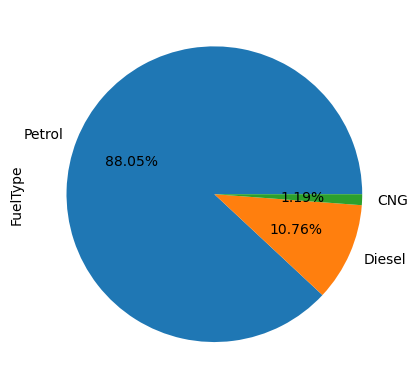

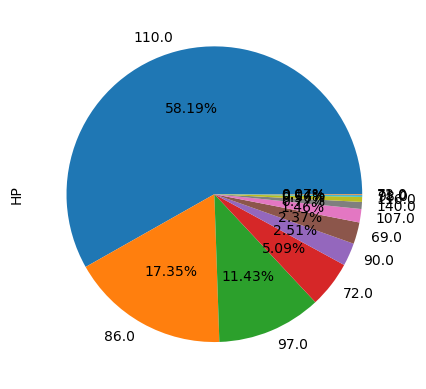

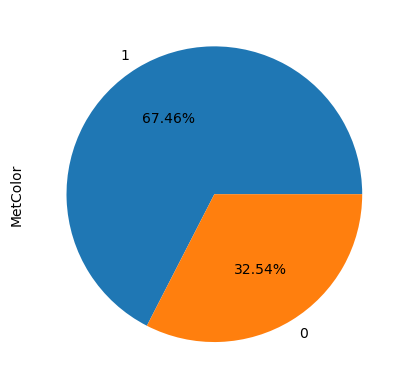

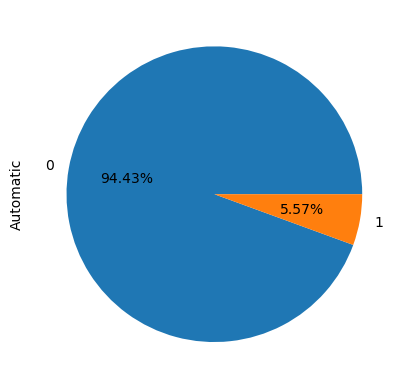

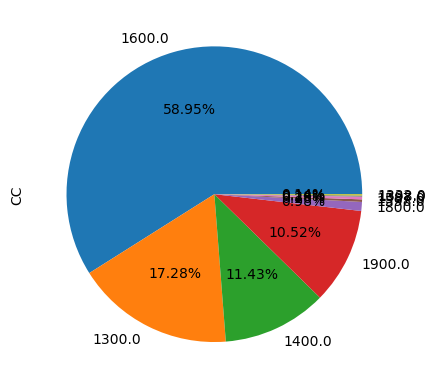

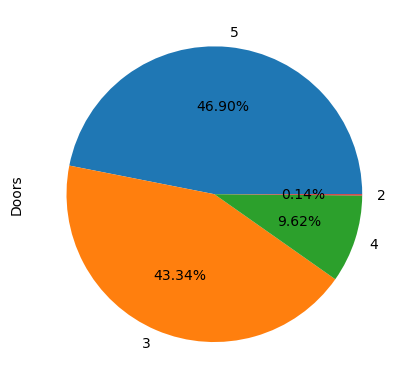

In [20]:
for i in categorical:
    plt.figure(i)
    df[i].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
    print()

## Count Plot

<BarContainer object of 3 artists>


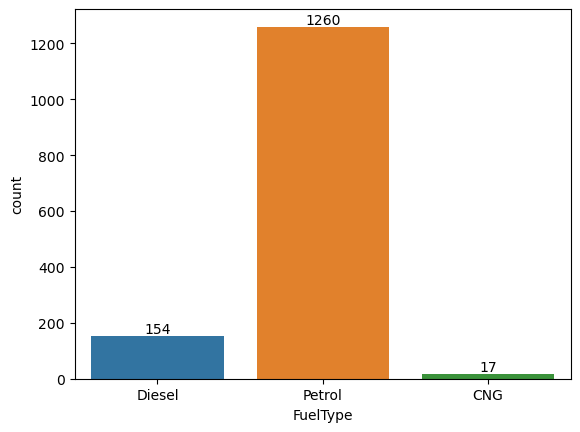

<BarContainer object of 12 artists>


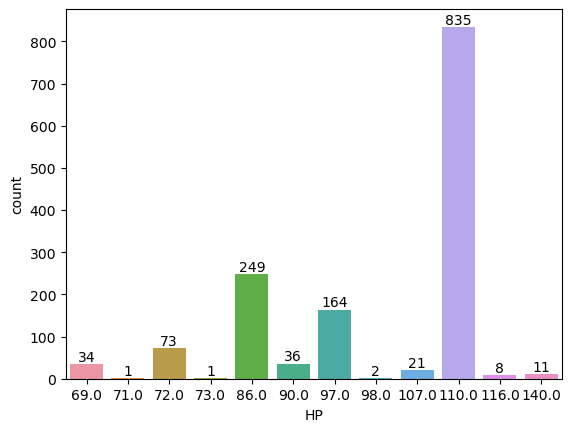

<BarContainer object of 2 artists>


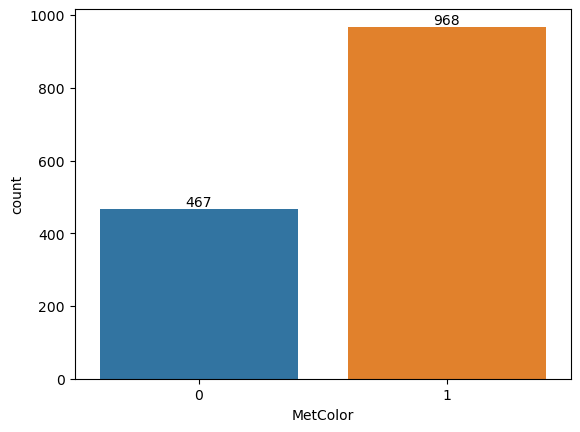

<BarContainer object of 2 artists>


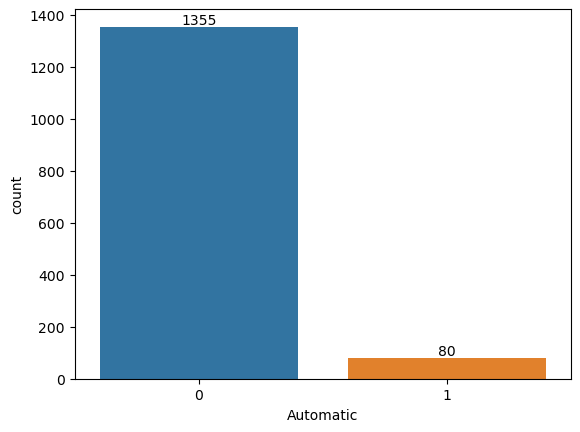

<BarContainer object of 9 artists>


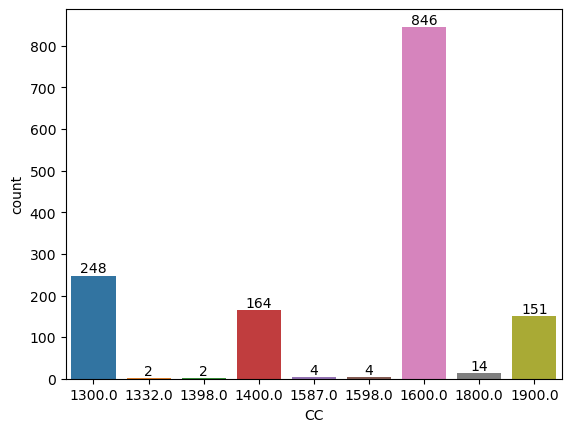

<BarContainer object of 4 artists>


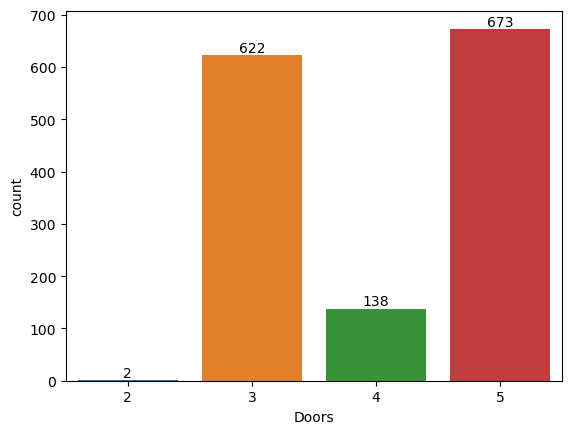

In [28]:
for j in categorical:
    ax = sns.countplot(data = df, x = j)

    for i in ax.containers:
        print(i)
        ax.bar_label(i)
        plt.show()

## Bar Plot

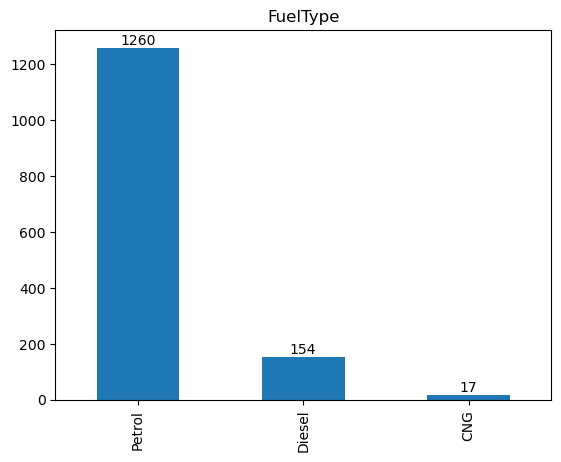

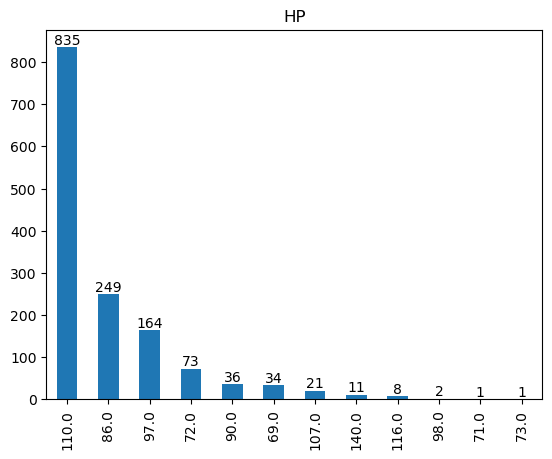

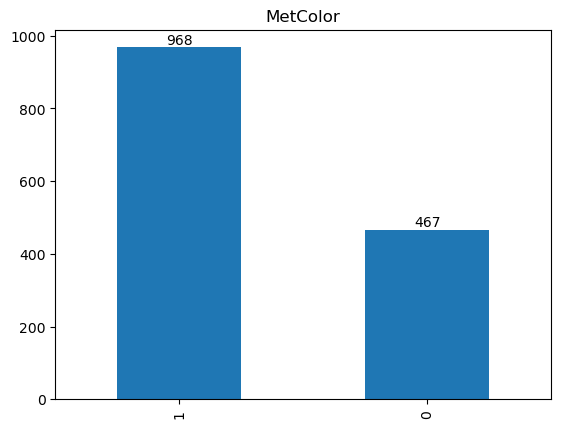

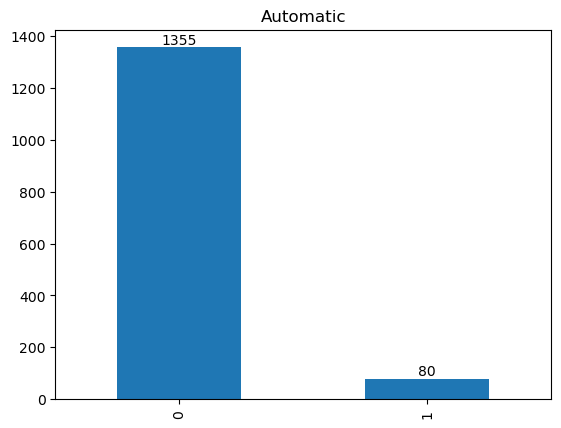

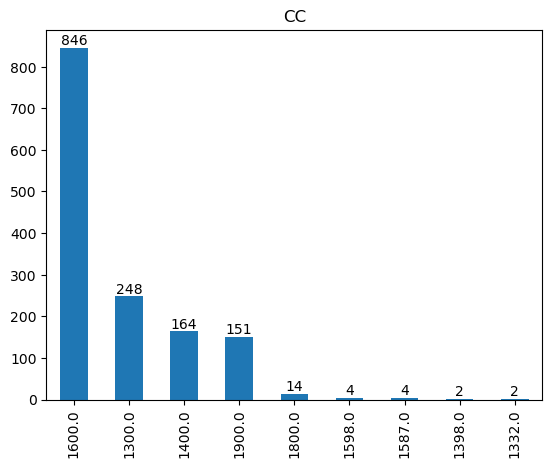

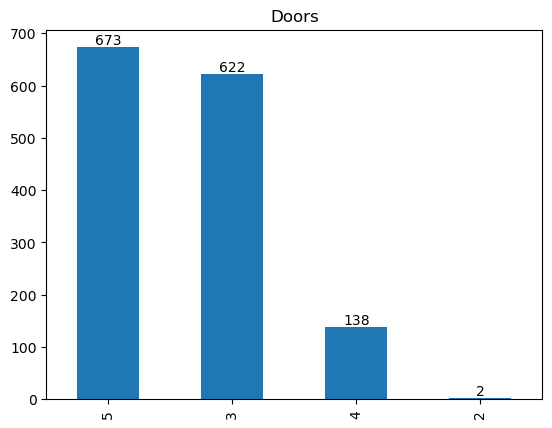

In [35]:
for j in categorical:
    plt.figure(j)
    ax = df[j].value_counts().plot(kind = 'bar')
    plt.title(j)

    for i in ax.containers:
        ax.bar_label(i)

### Missing Value Treatement

In [107]:
df[Continuouscol].isnull().sum()

Price     0
Age       0
KM        0
Weight    0
dtype: int64

In [245]:
df[(df['Age'].isnull())]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [246]:
df[(df['Age'].isnull()) &(df['FuelType']=='Petrol') & (df['HP']==97) & (df['CC']==1400) & (df['MetColor']==1) & (df['Price']==15750)]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [247]:
df['Age'][(df['FuelType']=='Petrol') & (df['HP']==97) & (df['CC']==1400) & (df['MetColor']==1) & (df['Price']==15750)].dropna()

31    22.0
51    30.0
Name: Age, dtype: float64

In [248]:
df['Age'][df['Age'].isnull()] = df['Age'][(df['FuelType']=='Petrol') & (df['HP']==97) & (df['CC']==1400) & (df['MetColor']==1) & (df['Price']==15750)].dropna().sample(df['Age'].isnull().sum(), random_state = 2).values

In [249]:
df[df['CC'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1392,7500,79.0,49827,Petrol,86,1,0,NaN,5,1035.0
1401,8950,71.0,47633,Petrol,110,1,0,NaN,5,1075.0


In [250]:
df['CC'][df['CC'].isnull()] = df['CC'][(df['Age']>70) & (df['MetColor']==1) & (df['Doors']==5) &(df['FuelType']=='Petrol')].dropna().sample(2, random_state = 3).values

In [251]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       2
dtype: int64

In [252]:
import warnings

warnings.filterwarnings('ignore')

In [253]:
df[df['Weight'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1396,9800,77.0,48838,Petrol,110,0,0,1600.0,3,NaN
1408,9250,80.0,44444,Petrol,110,1,0,1600.0,3,NaN


In [256]:
df['Weight'].fillna(value = df['Weight'].median(), inplace = True)

In [172]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [260]:
mean1 = df['KM'][(df['Age']==50) & (df['FuelType']=='Diesel')].mean().round()
mean1

35220.0

In [285]:
df[df['KM']==1]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,4.0,1.0,Diesel,116,0,0,2000.0,5,1480.0
117,17900,7.0,1.0,Petrol,110,1,0,1600.0,3,1105.0
169,17795,9.0,1.0,Petrol,98,1,0,1400.0,4,1065.0
170,18245,9.0,1.0,Petrol,110,1,0,1600.0,5,1075.0
184,17795,1.0,1.0,Petrol,98,1,0,1400.0,4,1100.0
185,18245,1.0,1.0,Petrol,110,1,0,1600.0,5,1075.0


In [283]:
df['KM'][(df['Age']==76) & (df['FuelType']=='Petrol')& (df['Price']<=7000)& (df['KM']!=1)].mean().round()

95448.0

In [284]:
df['KM'] = np.where((df['Age']==76) & (df['FuelType']=='Petrol')& (df['Price']<=7000)& (df['KM']==1), 
                    df['KM'][(df['Age']==76) & (df['FuelType']=='Petrol')& (df['Price']<=7000)& (df['KM']!=1)].mean().round(), 
                    df['KM'])

In [8]:
df[df['Age']==9]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
161,19600,9.0,7650.0,Petrol,110,1,0,1600.0,5,1115.0
168,17795,9.0,1.0,Petrol,98,1,0,1400.0,4,1065.0
169,18245,9.0,1.0,Petrol,110,1,0,1600.0,5,1075.0


In [11]:
df['KM'] = np.where((df['Age']==9) & (df['KM']==1), 7650, df['KM'])

In [15]:
df[df['FuelType'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
14,22500,32.0,34131.0,NaN,192,1,0,1800.0,3,1185.0
473,10450,48.0,64193.0,NaN,110,1,0,1600.0,3,1040.0
685,8950,65.0,100550.0,NaN,110,1,0,1600.0,5,1075.0
1422,7950,80.0,35821.0,NaN,86,0,1,1300.0,3,1015.0


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy = 'most frequent')

In [11]:
numcol = df.select_dtypes(include = ['int', 'float']).columns
numcol

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')

In [12]:
Continuouscol = []

for i in numcol:
    if df[i].nunique()> 5:
        Continuouscol.append(i)
print(Continuouscol)  

['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']


### Outlier Treatement:-

In [41]:
for i in Continuouscol:
    percentile25 = df[i].quantile(.25)
    percentile75 = df[i].quantile(.75)
    
    IQR = percentile75-percentile25
    
    upperlimit = percentile75+1.5*IQR
    lowerlimit = percentile25-1.5*IQR
    
    
    df[i] = np.where(df[i]>upperlimit,upperlimit,np.where(df[i]<lowerlimit, lowerlimit,df[i]))
    
    print(df[i])

0       13500.0
1       13750.0
2       13950.0
3       14950.0
4       13750.0
         ...   
1430     7500.0
1431    10845.0
1432     8500.0
1433     7250.0
1434     6950.0
Name: Price, Length: 1435, dtype: float64
0       23.0
1       23.0
2       24.0
3       26.0
4       30.0
        ... 
1430    69.0
1431    72.0
1432    71.0
1433    70.0
1434    76.0
Name: Age, Length: 1435, dtype: float64
0       46986.0
1       72937.0
2       41711.0
3       48000.0
4       38500.0
         ...   
1430    20544.0
1431    19000.0
1432    17016.0
1433    16916.0
1434    95448.0
Name: KM, Length: 1435, dtype: float64
0        90.0
1        90.0
2        90.0
3        90.0
4        90.0
        ...  
1430     86.0
1431     86.0
1432     86.0
1433     86.0
1434    110.0
Name: HP, Length: 1435, dtype: float64
0       1900.0
1       1900.0
2       1900.0
3       1900.0
4       1900.0
         ...  
1430    1300.0
1431    1300.0
1432    1300.0
1433    1300.0
1434    1600.0
Name: CC, Length: 1435, dt

## Box Plot after Outlier Treatement

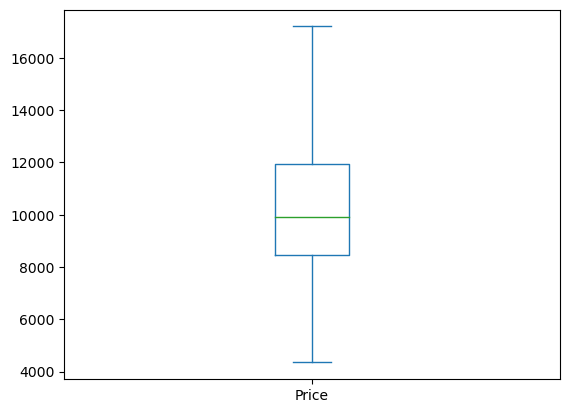

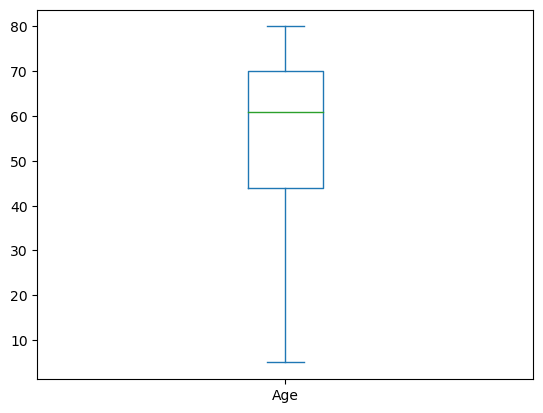

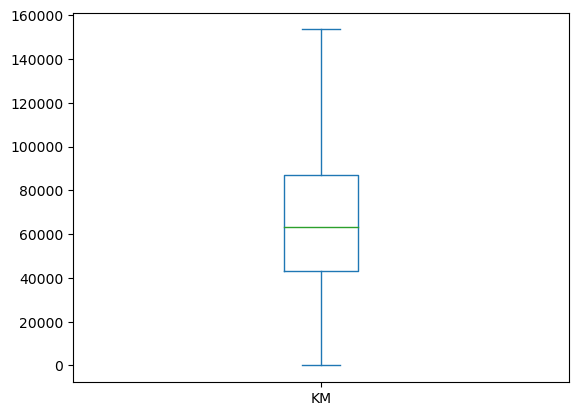

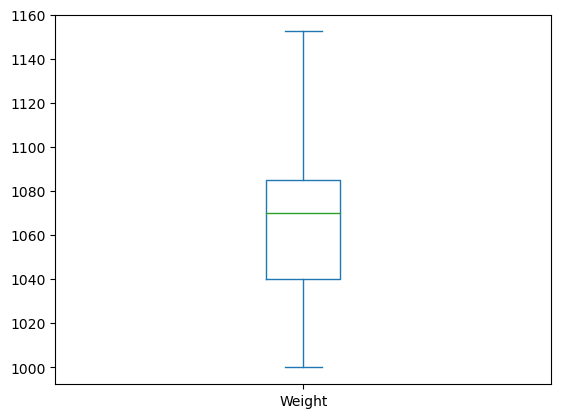

In [108]:
for i in Continuouscol:
    plt.figure(i)
    df[i].plot(kind = 'box')

## Checking the Skewness for Continuous Columns

In [110]:
for i in Continuouscol:
    print('The skewness of {} column is: {}'.format(i, round(df[i].skew(),2)))

The skewness of Price column is: 0.92
The skewness of Age column is: -0.82
The skewness of KM column is: 0.59
The skewness of Weight column is: 0.52


### Checking the Transformation for Skewed Columns

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [113]:
trans = {'LogTransform':FunctionTransformer(func = np.log1p), 
        'SquareTransform':FunctionTransformer(func = np.square),
        'SquareRootTransform':FunctionTransformer(func = np.sqrt),
        'ReciprocalTransform':FunctionTransformer(func = lambda x :x**.2)}

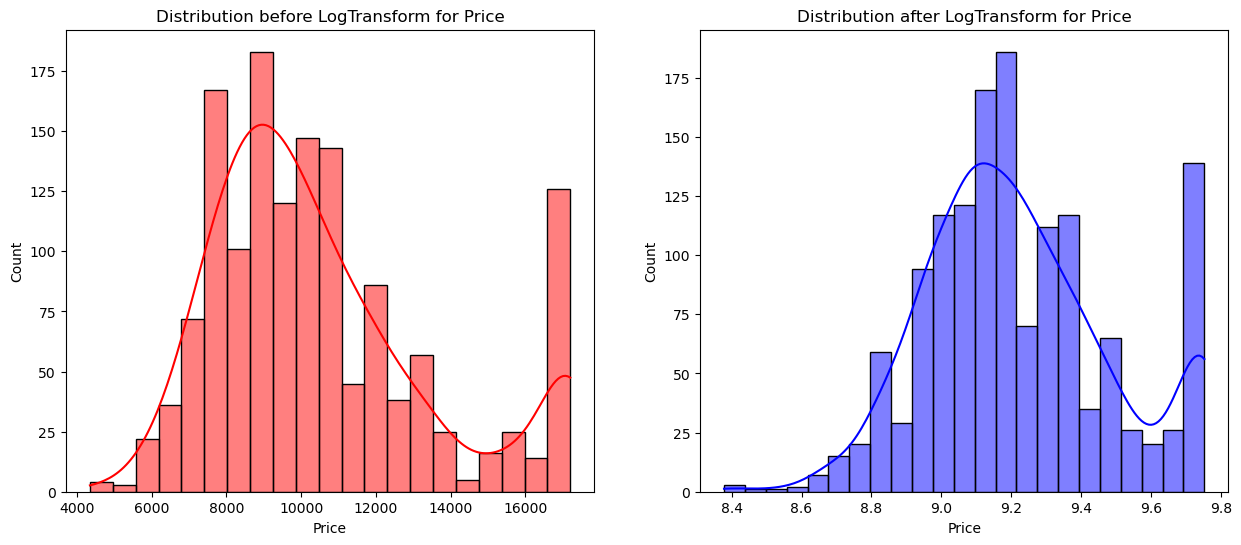

Skewness before LogTransform transformation 0.9193292533286169 and skewness after transformation 0.34187092269088193 for Price


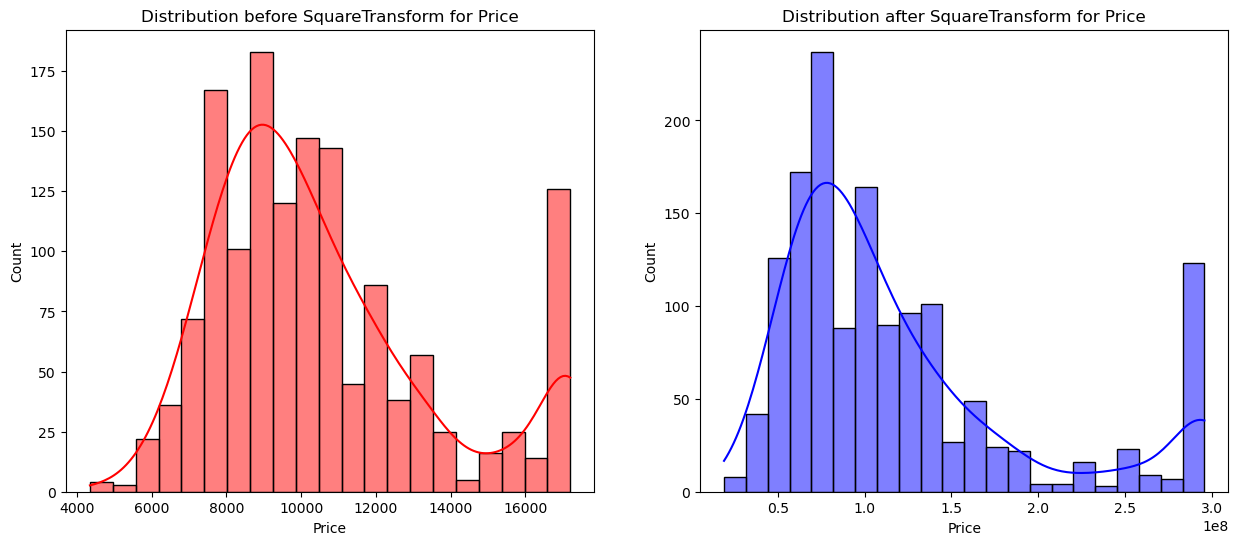

Skewness before SquareTransform transformation 0.9193292533286169 and skewness after transformation 1.3697719020026176 for Price


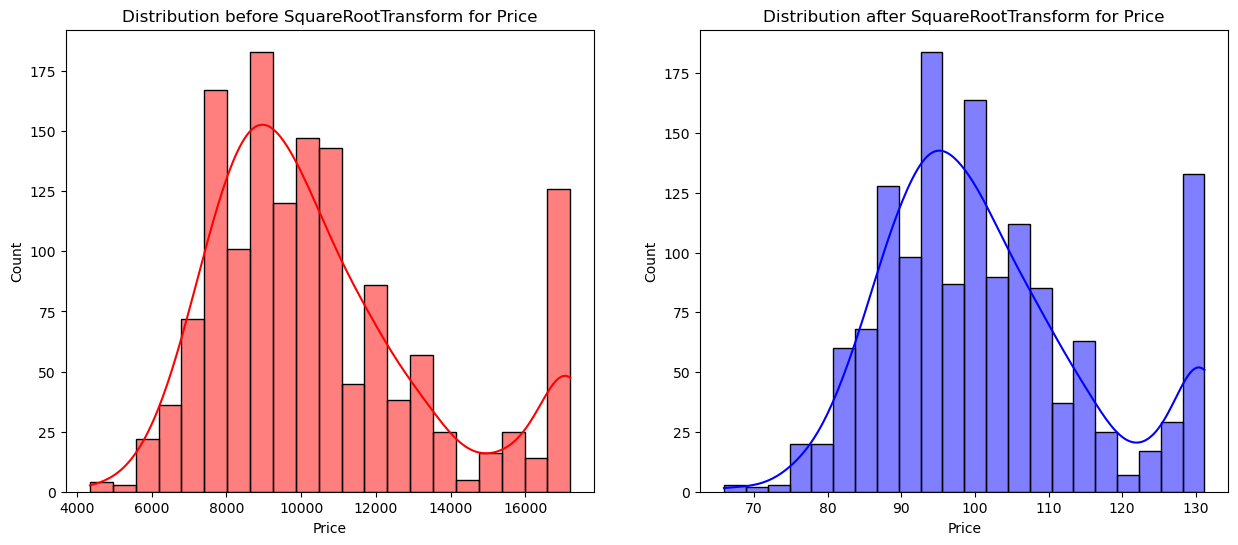

Skewness before SquareRootTransform transformation 0.9193292533286169 and skewness after transformation 0.6483821339997556 for Price


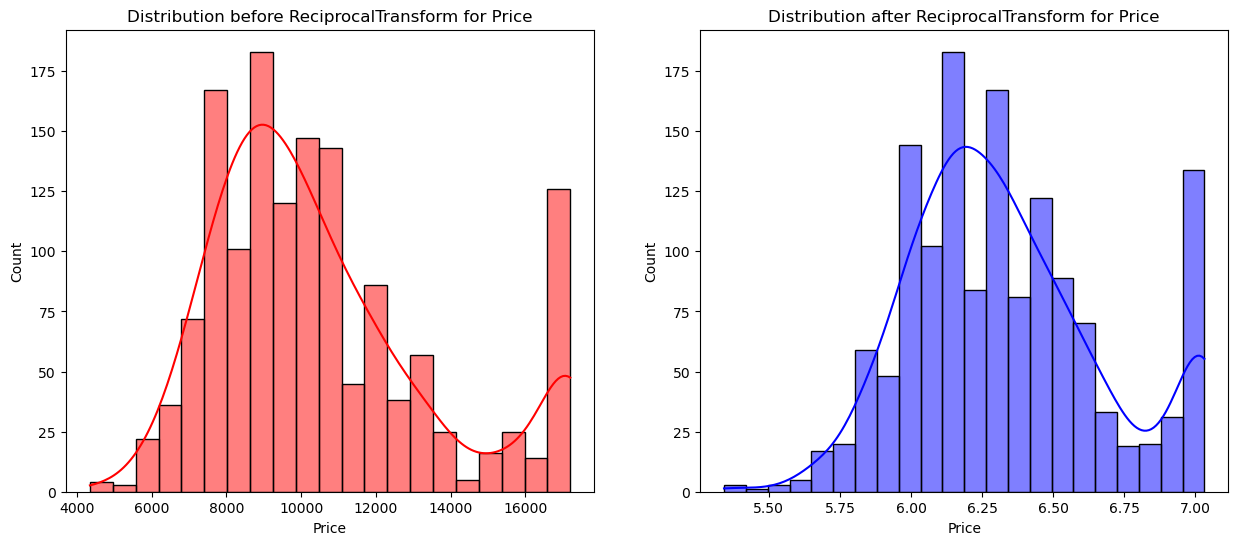

Skewness before ReciprocalTransform transformation 0.9193292533286169 and skewness after transformation 0.46912132211152613 for Price


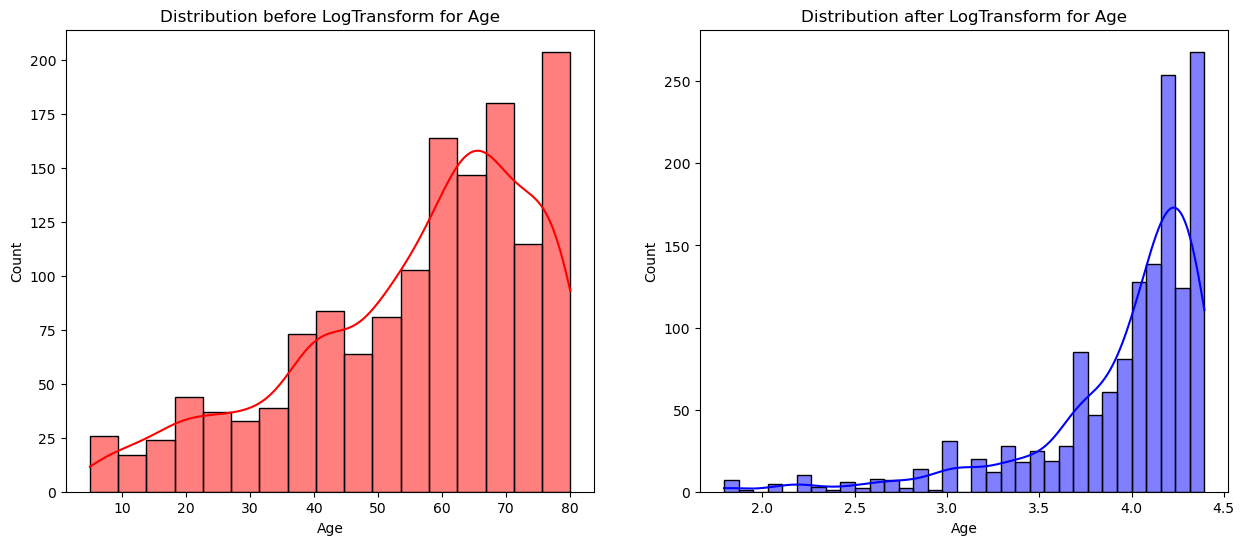

Skewness before LogTransform transformation -0.8165524165040785 and skewness after transformation -2.0082951625519665 for Age


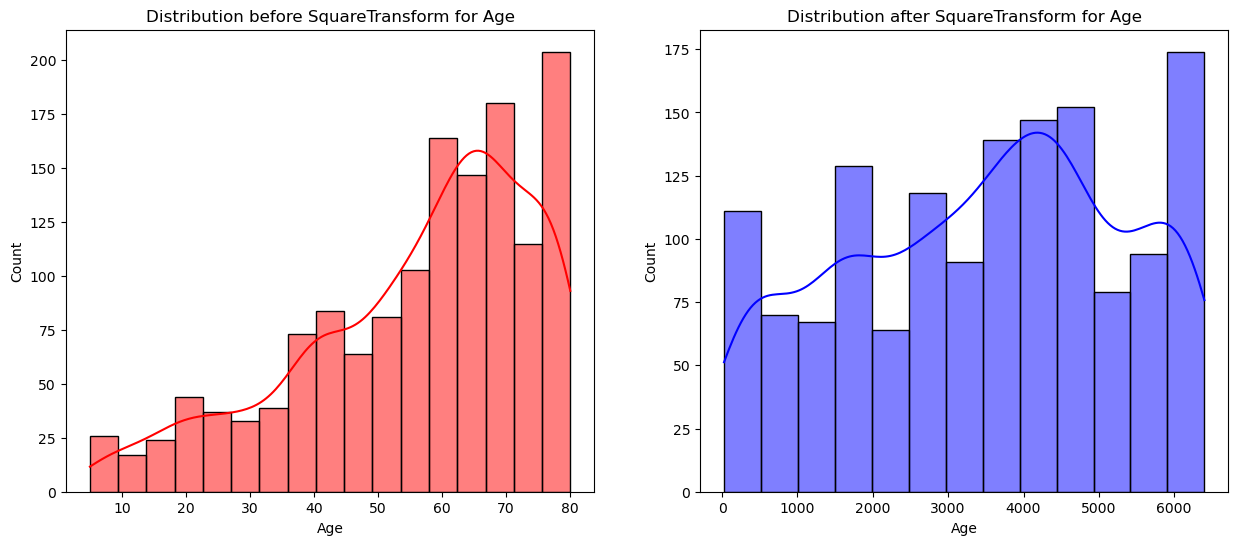

Skewness before SquareTransform transformation -0.8165524165040785 and skewness after transformation -0.1881288173575244 for Age


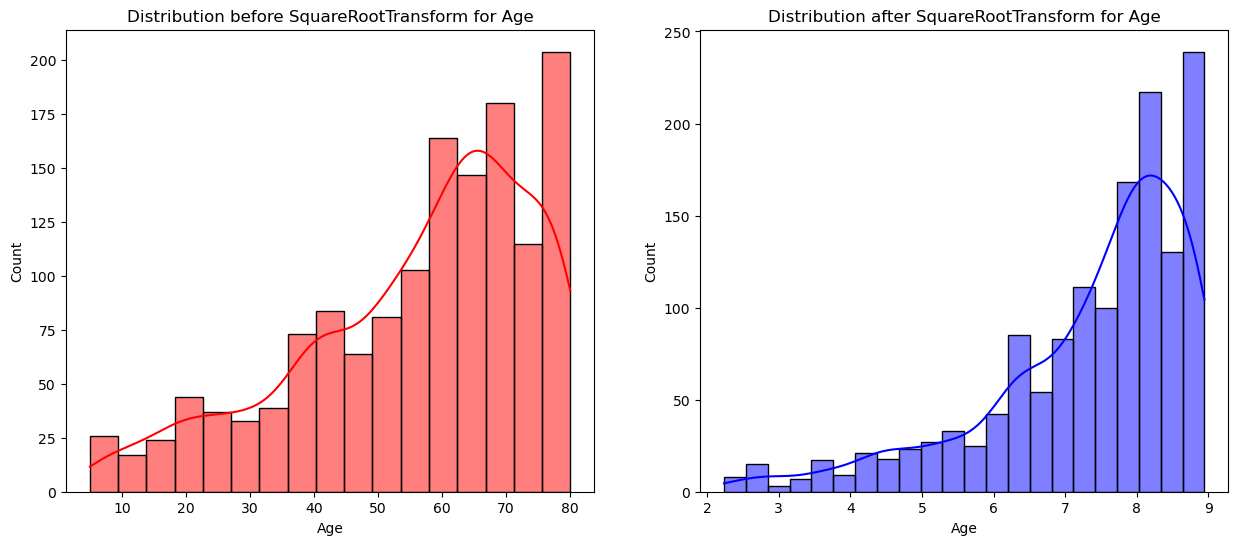

Skewness before SquareRootTransform transformation -0.8165524165040785 and skewness after transformation -1.3186660335868945 for Age


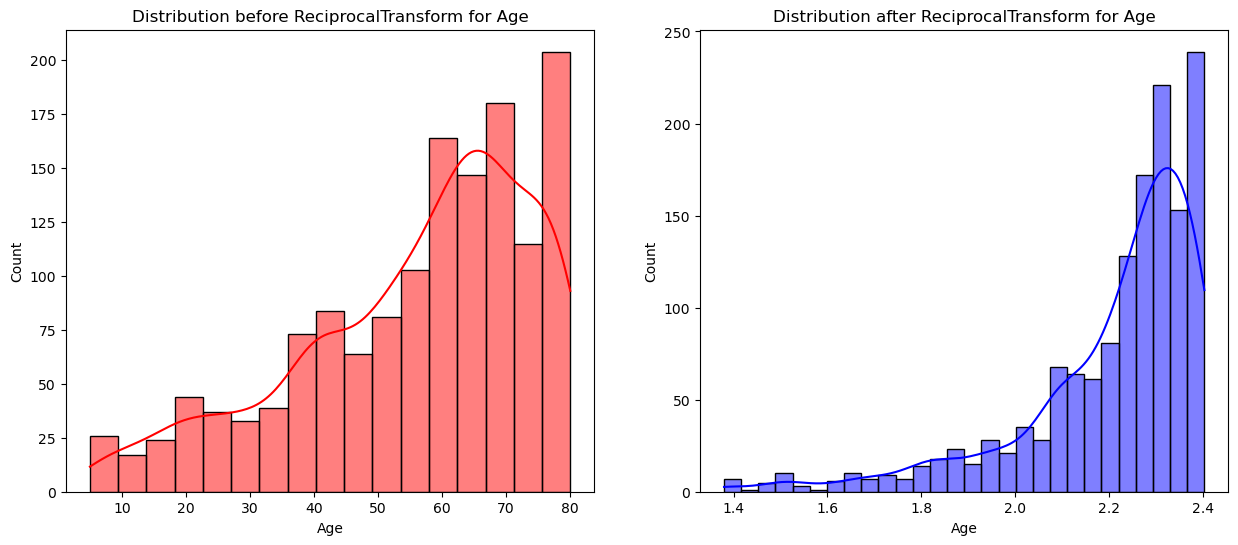

Skewness before ReciprocalTransform transformation -0.8165524165040785 and skewness after transformation -1.737239151404274 for Age


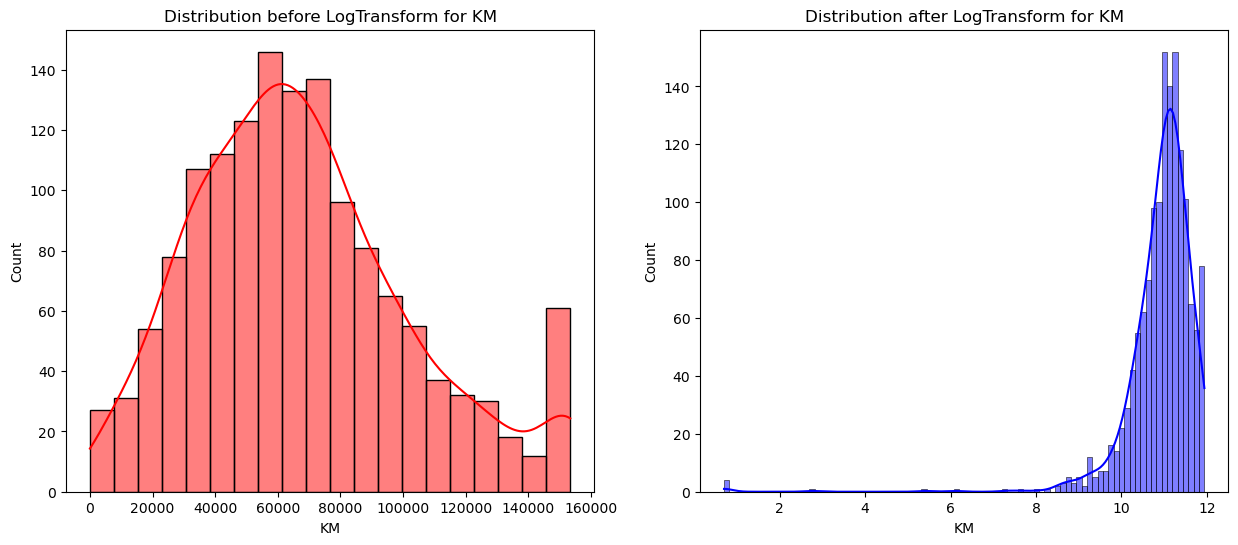

Skewness before LogTransform transformation 0.5864042369078162 and skewness after transformation -5.7239082579502 for KM


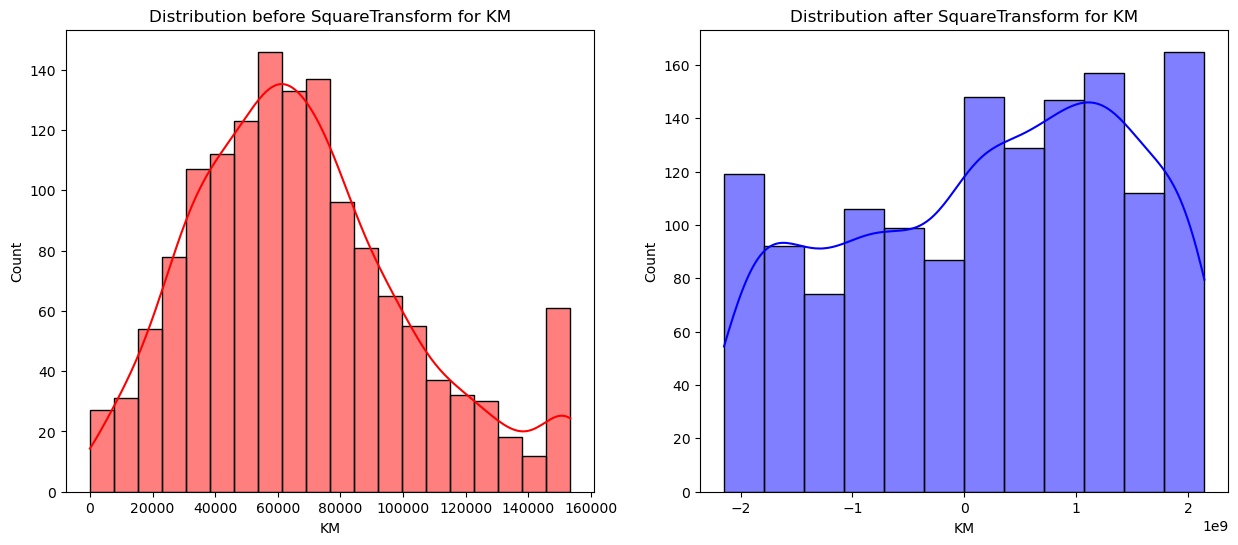

Skewness before SquareTransform transformation 0.5864042369078162 and skewness after transformation -0.2427780005597792 for KM


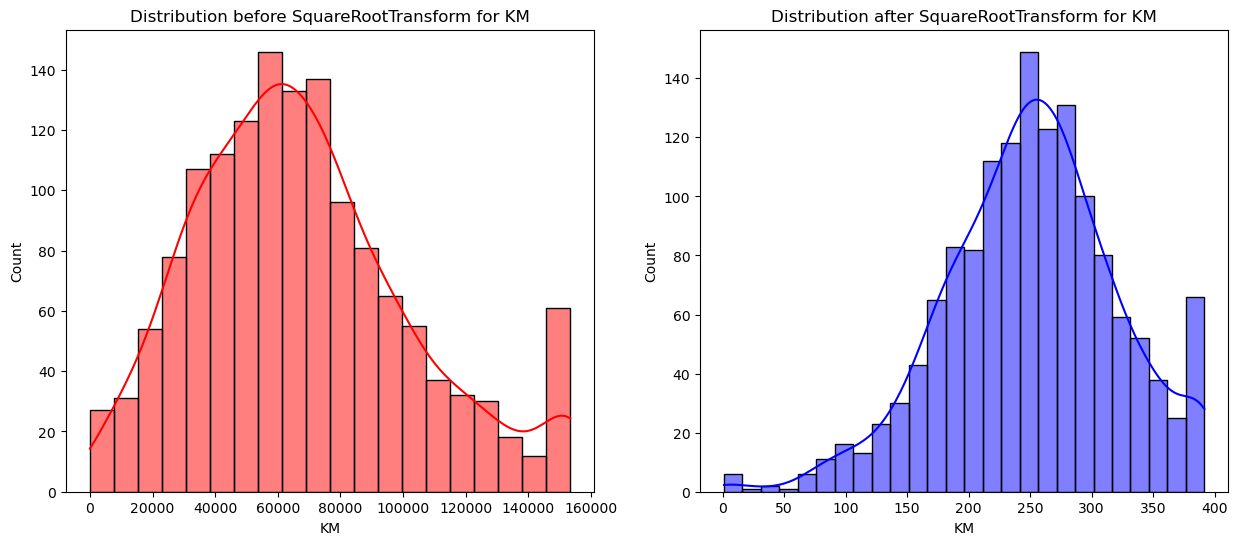

Skewness before SquareRootTransform transformation 0.5864042369078162 and skewness after transformation -0.2633821165837007 for KM


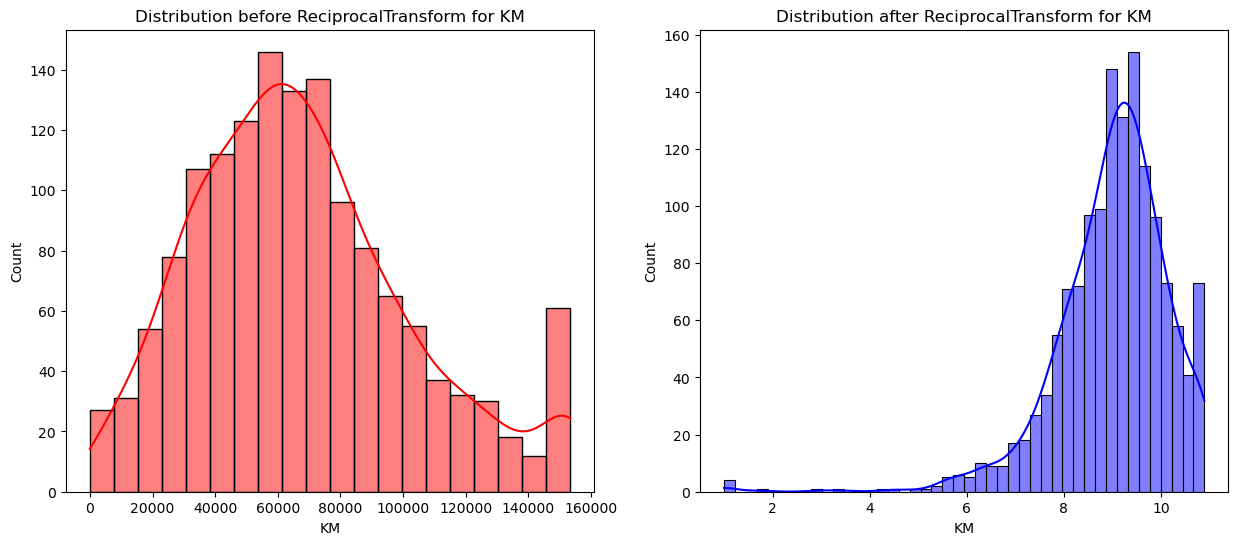

Skewness before ReciprocalTransform transformation 0.5864042369078162 and skewness after transformation -1.6890277072270041 for KM


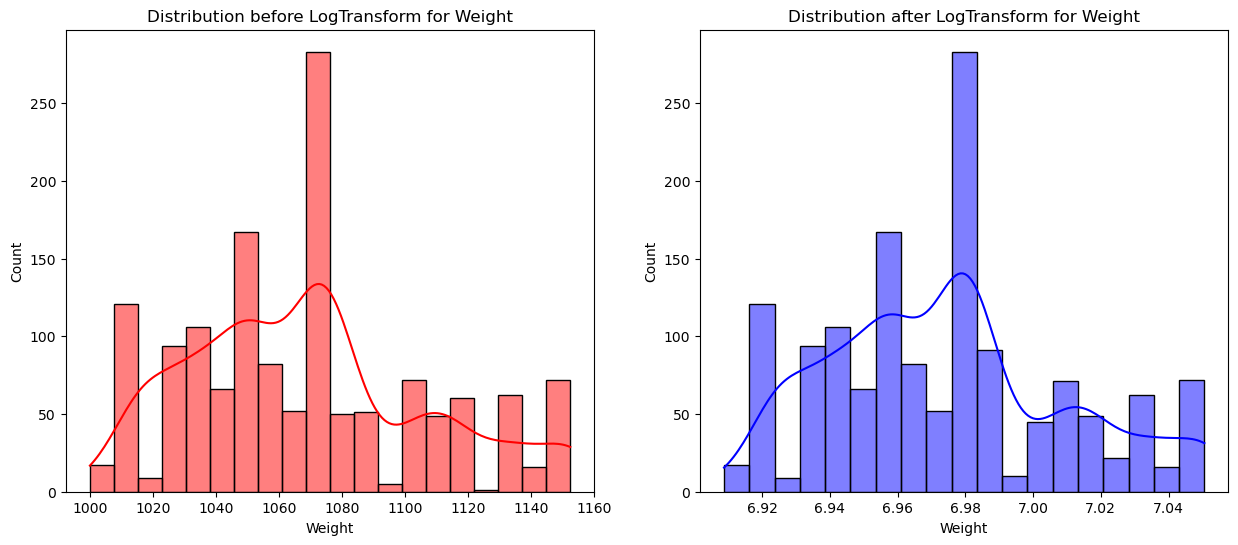

Skewness before LogTransform transformation 0.5152718250857347 and skewness after transformation 0.4452635997351852 for Weight


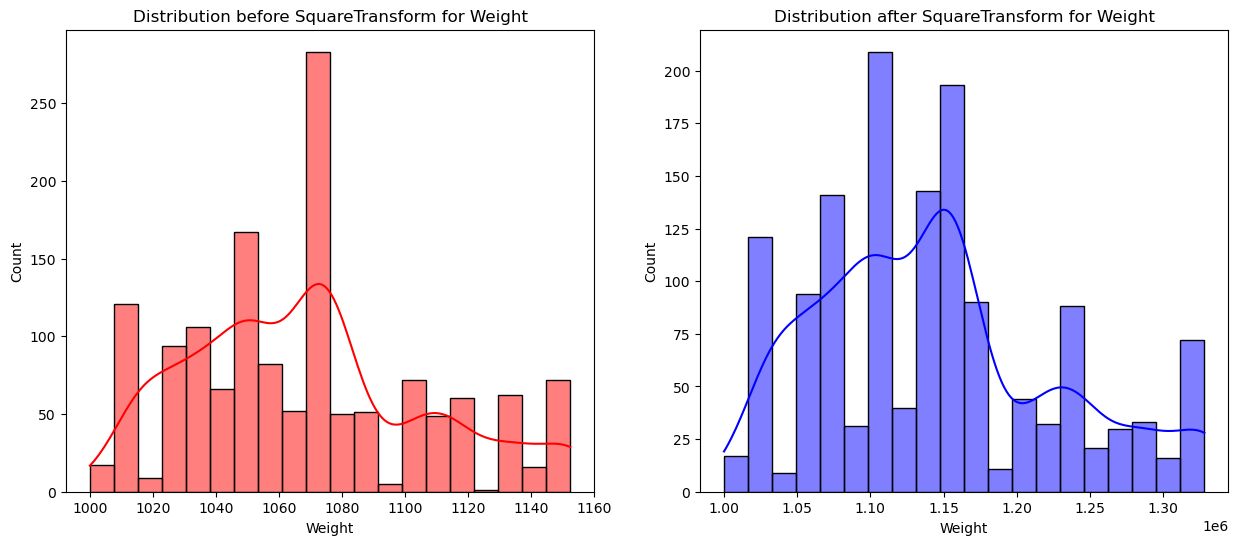

Skewness before SquareTransform transformation 0.5152718250857347 and skewness after transformation 0.5853334622535193 for Weight


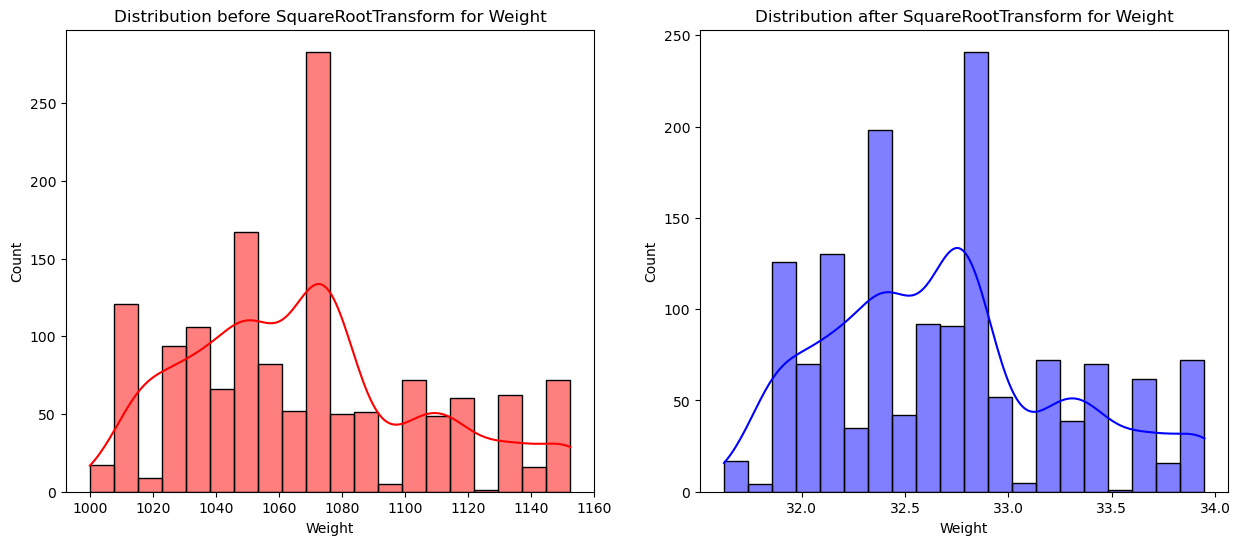

Skewness before SquareRootTransform transformation 0.5152718250857347 and skewness after transformation 0.4802312402802899 for Weight


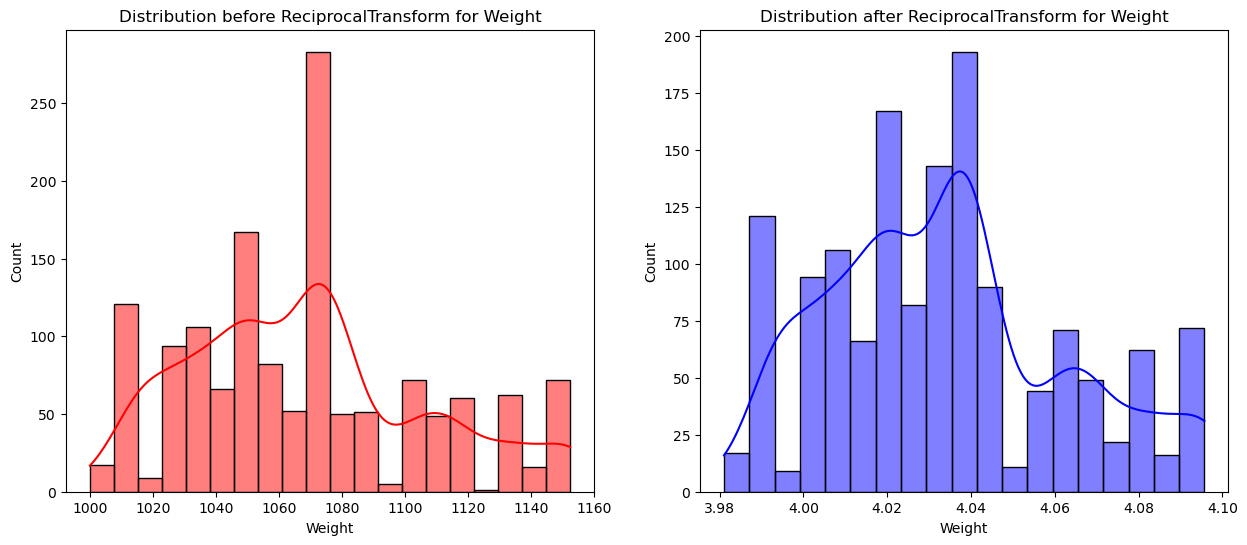

Skewness before ReciprocalTransform transformation 0.5152718250857347 and skewness after transformation 0.4592099987890449 for Weight


In [135]:
for j in Continuouscol:
    df1 = df[j]
    for i in trans:
        df2 = trans[i].fit_transform(df1)
    
        
        plt.figure(figsize = (15,6))
        plt.subplot(1,2,1)
        name = ['LogTransform', 'SquareTransform','Reciprocal']
        plt.title('Distribution before {} for {}'.format(i,j))
        sns.histplot(df1, kde = True, color = 'red')
    
        plt.subplot(1,2,2)
        plt.title('Distribution after {} for {}'.format(i,j))
        sns.histplot(df2, kde = True, color = 'blue')
        plt.show()
        
        print('Skewness before {} transformation {} and skewness after transformation {} for {}'.format(i, df1.skew(),df2.skew(),j))

In [136]:
for j in Continuouscol:
    df1 = df[j]
    for i in trans:
        df2 = trans[i].fit_transform(df1)
        print('skewness after {} transformation is {} for {}'.format(i,df2.skew(),j))        

skewness after LogTransform transformation is 0.34187092269088193 for Price
skewness after SquareTransform transformation is 1.3697719020026176 for Price
skewness after SquareRootTransform transformation is 0.6483821339997556 for Price
skewness after ReciprocalTransform transformation is 0.46912132211152613 for Price
skewness after LogTransform transformation is -2.0082951625519665 for Age
skewness after SquareTransform transformation is -0.1881288173575244 for Age
skewness after SquareRootTransform transformation is -1.3186660335868945 for Age
skewness after ReciprocalTransform transformation is -1.737239151404274 for Age
skewness after LogTransform transformation is -5.7239082579502 for KM
skewness after SquareTransform transformation is -0.2427780005597792 for KM
skewness after SquareRootTransform transformation is -0.2633821165837007 for KM
skewness after ReciprocalTransform transformation is -1.6890277072270041 for KM
skewness after LogTransform transformation is 0.445263599735185

In [137]:
from sklearn.preprocessing import PowerTransformer

In [138]:
trans2 =  {'Box-Cox':PowerTransformer(method = "box-cox", standardize=True),
               'Yeo-Johnson':PowerTransformer(standardize=True)}

In [139]:
for j in Continuouscol:
    df1 = df[j]
    for i in trans2:
        df2 = trans2[i].fit_transform(df1.values.reshape(-1,1))
        
        dframe = pd.DataFrame(df2)
        print('Skewness before {} transformation {} and skewness after transformation {} for {}'.format(i, df1.skew(),dframe.skew(),j))

Skewness before Box-Cox transformation 0.9193292533286169 and skewness after transformation 0    0.00766
dtype: float64 for Price
Skewness before Yeo-Johnson transformation 0.9193292533286169 and skewness after transformation 0    0.007664
dtype: float64 for Price
Skewness before Box-Cox transformation -0.8165524165040785 and skewness after transformation 0   -0.350021
dtype: float64 for Age
Skewness before Yeo-Johnson transformation -0.8165524165040785 and skewness after transformation 0   -0.341154
dtype: float64 for Age
Skewness before Box-Cox transformation 0.5864042369078162 and skewness after transformation 0   -0.052605
dtype: float64 for KM
Skewness before Yeo-Johnson transformation 0.5864042369078162 and skewness after transformation 0   -0.047926
dtype: float64 for KM
Skewness before Box-Cox transformation 0.5152718250857347 and skewness after transformation 0    0
dtype: int32 for Weight
Skewness before Yeo-Johnson transformation 0.5152718250857347 and skewness after transfo

In [26]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,1,0,1900.0,3,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,1,0,1900.0,3,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,1,0,1900.0,3,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0,0,1900.0,3,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0,0,1900.0,3,1152.5


In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [141]:
transformer = ColumnTransformer(transformers = [
    ('trans1',SimpleImputer(strategy= 'most_frequent'),['FuelType'])], remainder = 'passthrough')

In [142]:
df = transformer.fit_transform(df)

In [143]:
df = pd.DataFrame(data = df, columns = ['FuelType','Price','Age','KM','HP','MetColor','Automatic','CC','Doors','Weight'])

In [144]:
df.isnull().sum()

FuelType     0
Price        0
Age          0
KM           0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## Biveriate Analysis

In [145]:
Continuouscol

['Price', 'Age', 'KM', 'Weight']

In [146]:
Continuouscol[1:]

['Age', 'KM', 'Weight']

## Scatter Plot Numerical column vs Target Variable

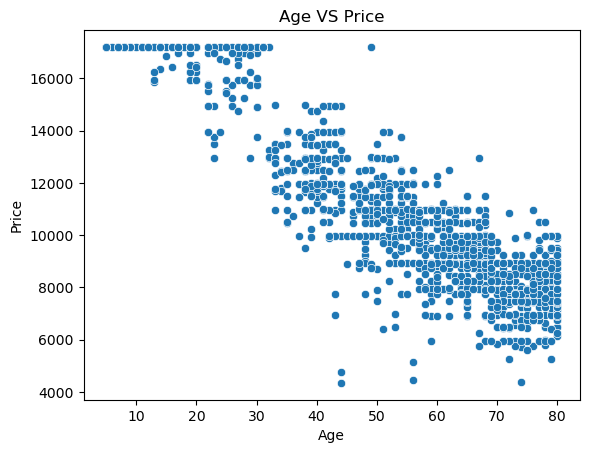

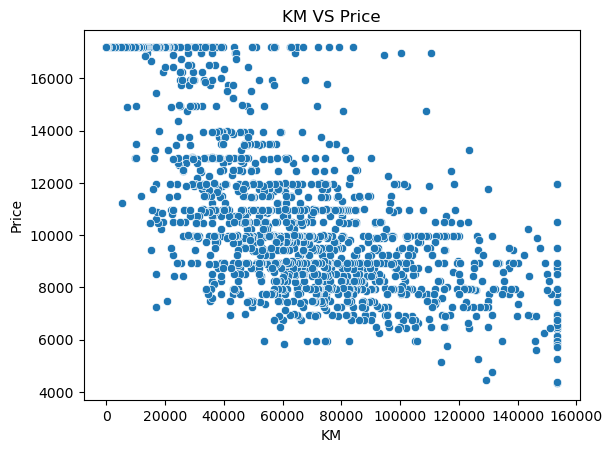

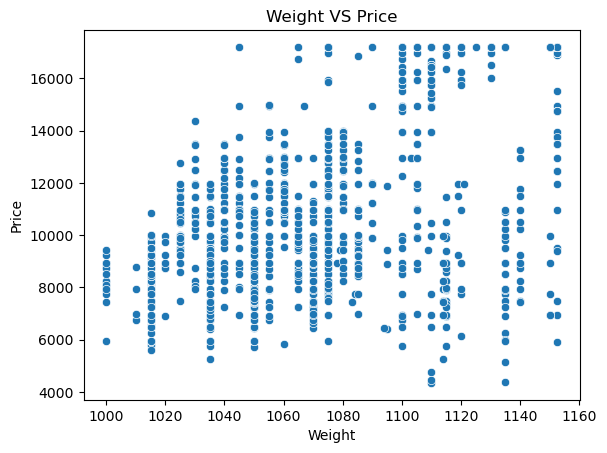

In [147]:
for i in Continuouscol[1:]:
    plt.figure(i)
    sns.scatterplot(data = df, x = i, y = 'Price')
    plt.title(i+' VS '+'Price')

# Scatter charts interpretation

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

### Checking Categorical Column from Numerical column

In [149]:
CategoricalNumcol = []

for i in numcol:
    if df[i].nunique() <= 12:
        CategoricalNumcol.append(i)
print(CategoricalNumcol)

['HP', 'MetColor', 'Automatic', 'CC', 'Doors']


### 2D Box-Plot with Categorical column VS Target Veriable (Continuous column)

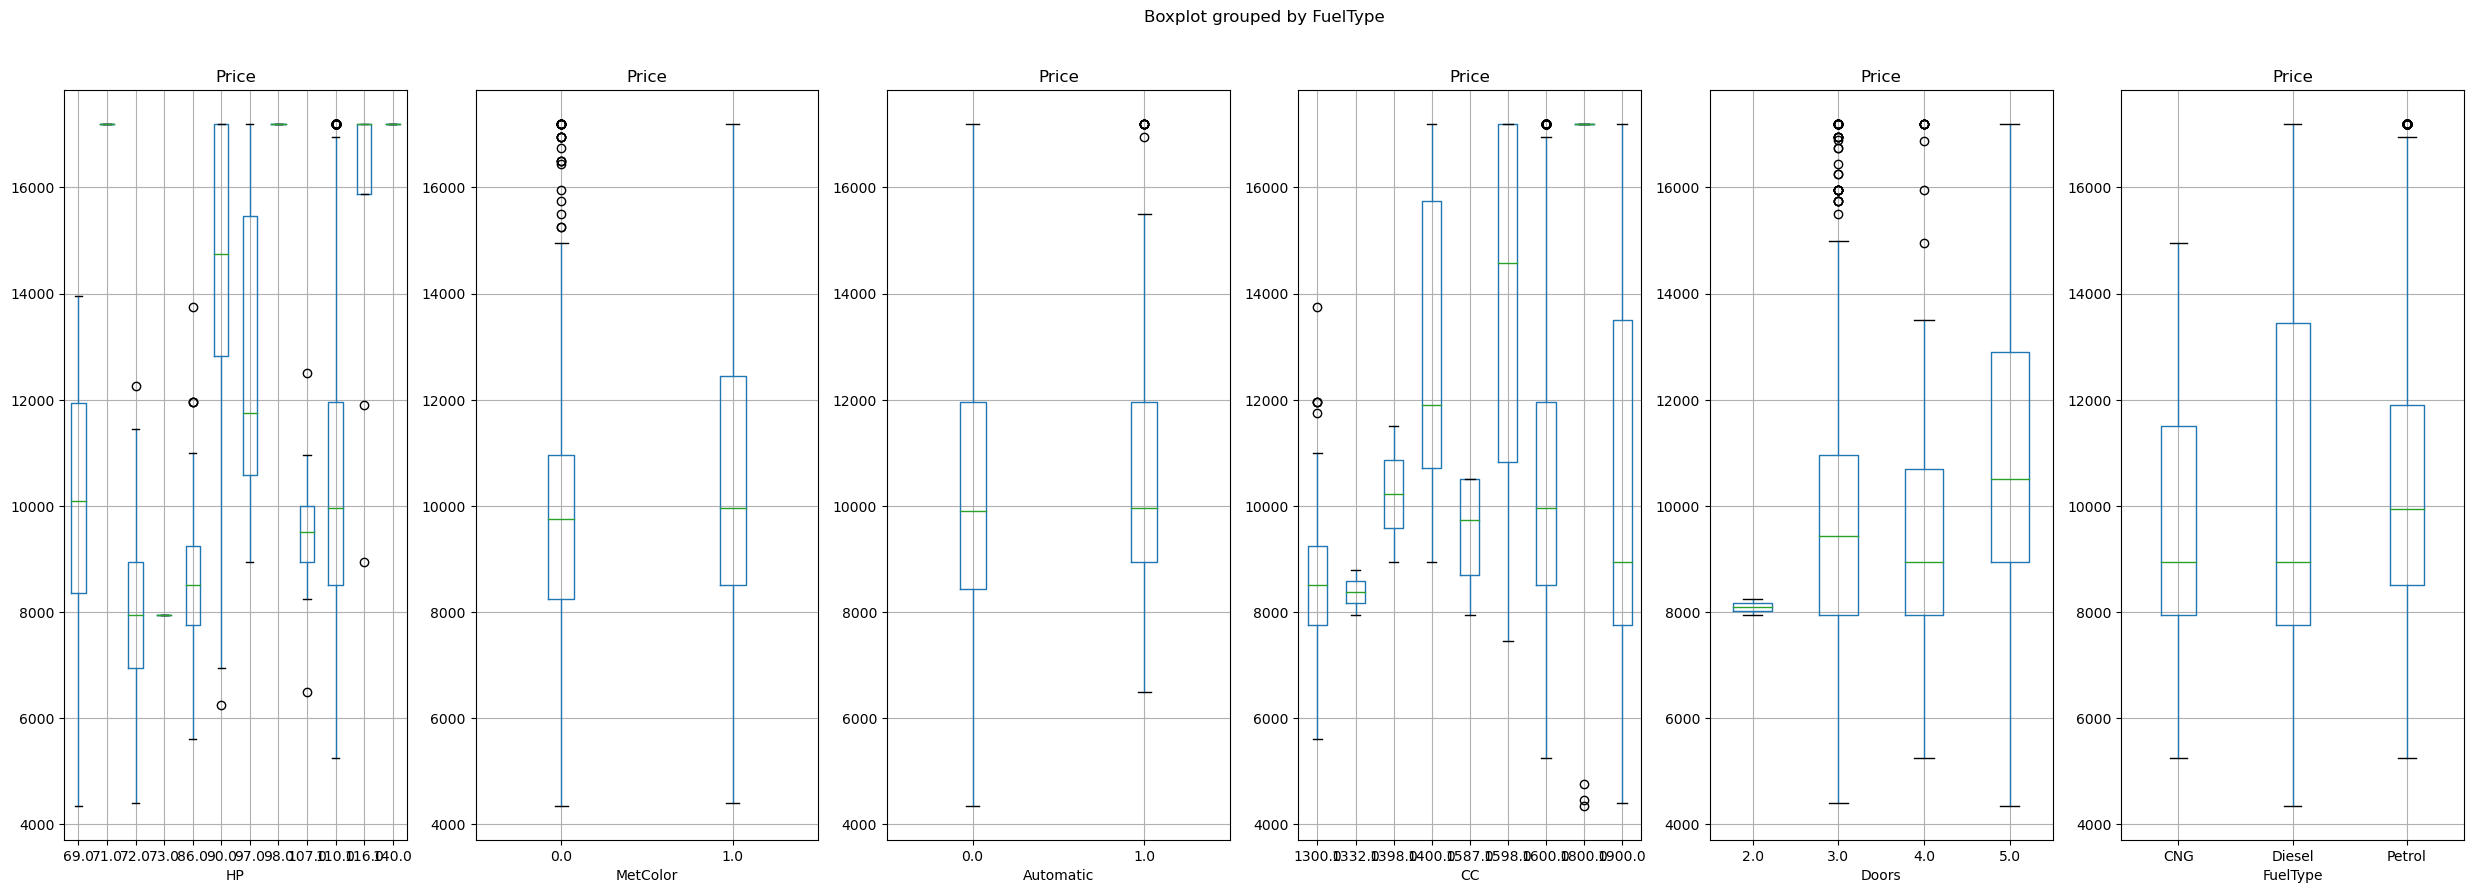

In [152]:
Categoricalcol = ['HP', 'MetColor', 'Automatic', 'CC', 'Doors','FuelType']

fig, plot = plt.subplots(nrows = 1, ncols = len(Categoricalcol), figsize = (30,10))
for plotnum, i in zip(Categoricalcol, range(len(Categoricalcol))):
    #plt.figure(i)
    df.boxplot(column = 'Price', by = plotnum, ax = plot[i])

## Box-Plots interpretation


* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

* In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","Automatic" and "MetColor" they seems like a border cases, as the boxes are close to each other.

**We confirm this by looking at the results of ANOVA test below**

In [153]:
import warnings
warnings.filterwarnings('ignore')

### 2D KDE plot for Numerical VS Numerical Column

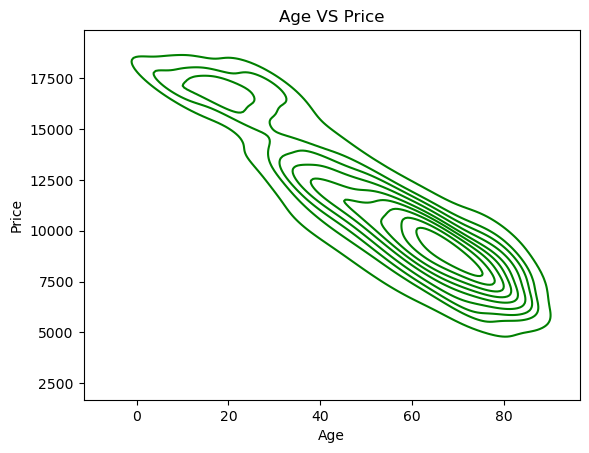

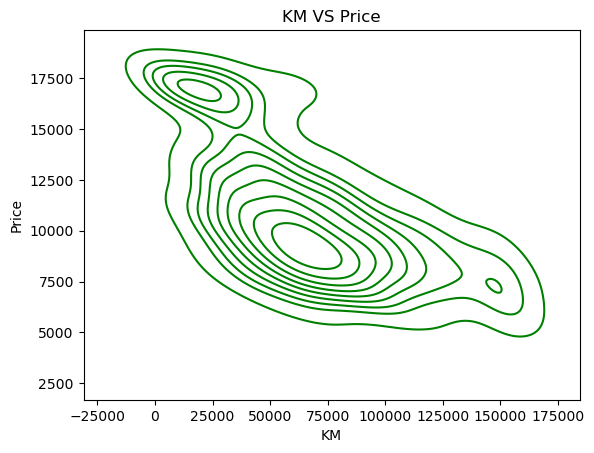

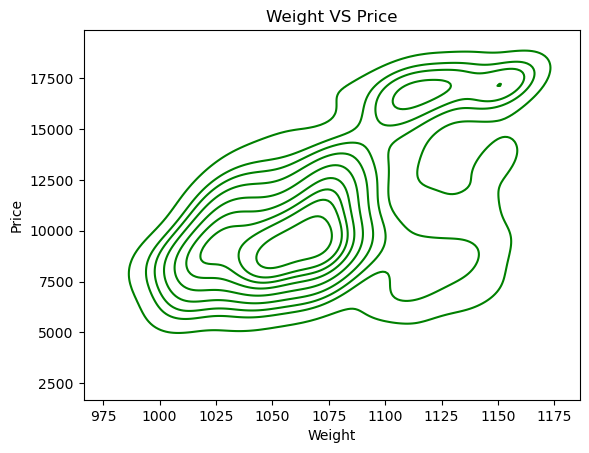

In [155]:
for i in Continuouscol[1:]:
    plt.figure(i)
    sns.kdeplot(x = i, y = 'Price', data = df, c = 'green')
    plt.title(i+ ' VS Price')

In [97]:
df.nunique()

FuelType        3
Price         190
Age            75
KM           1218
HP             12
MetColor        2
Automatic       2
CC              9
Doors           4
Weight         41
dtype: int64

### 2D Histogram for Numerical VS Numerical column

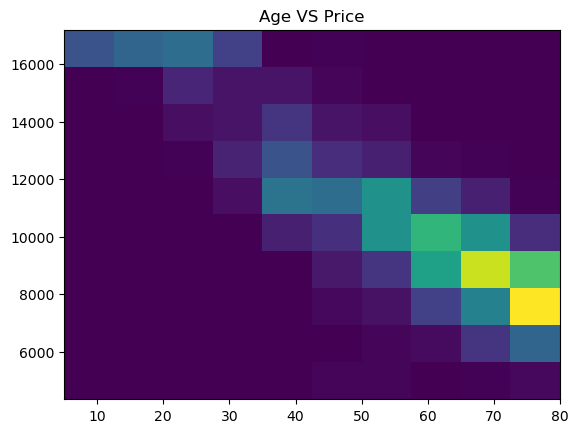

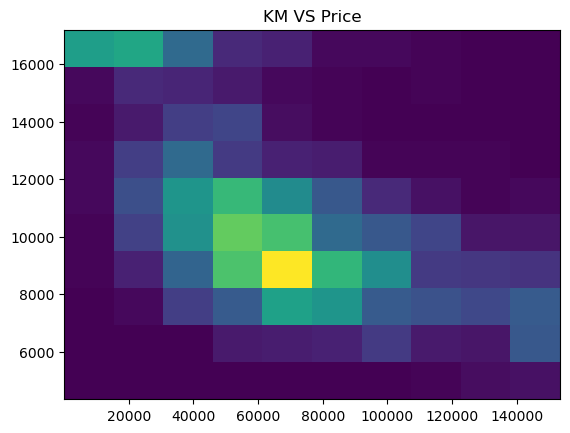

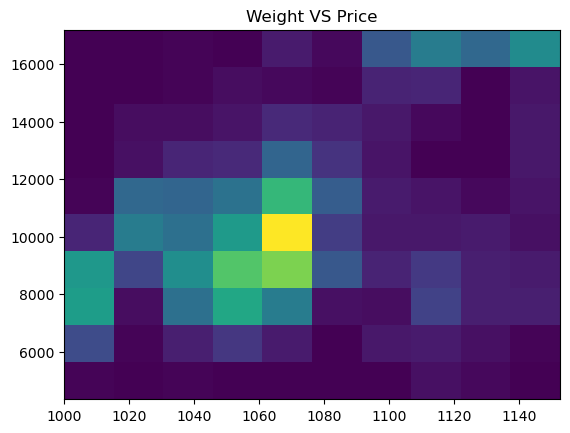

In [163]:
for i in Continuouscol[1:]:
    plt.figure(i)
    plt.hist2d(x = df[i], y = df['Price'])
    plt.title(i+' VS Price')
    plt.show()
    

## Correlation Pairplot

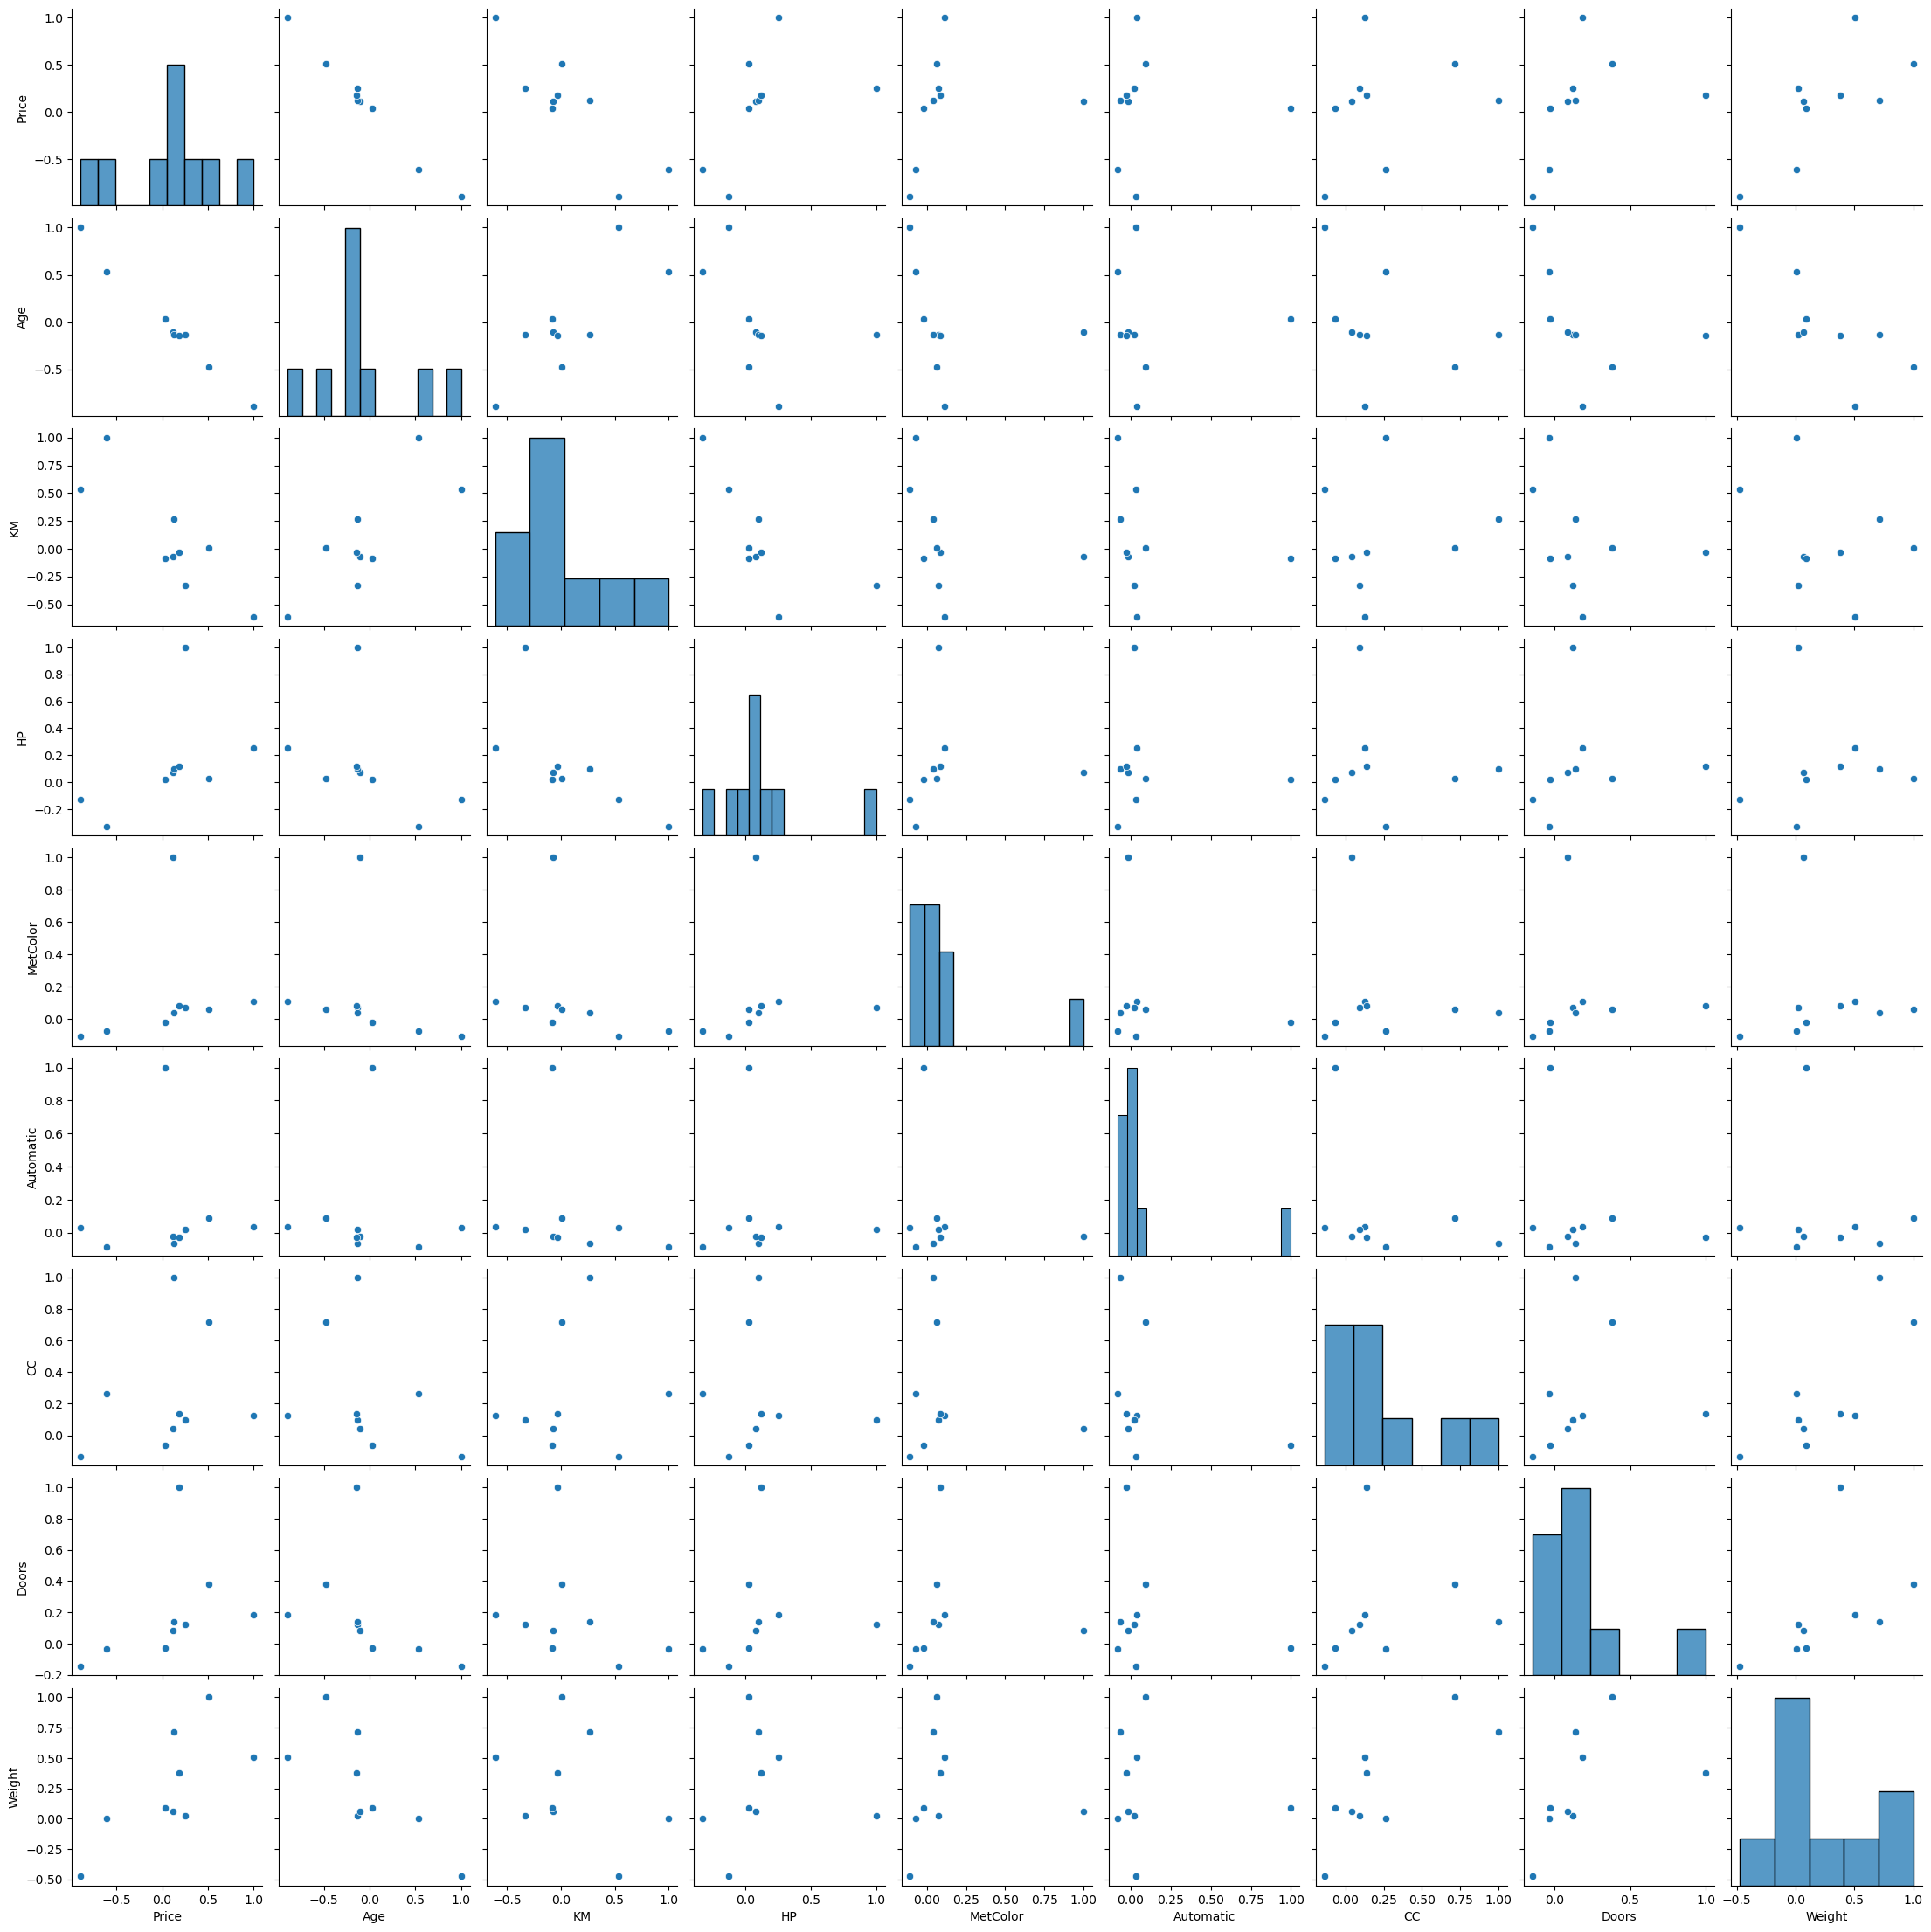

In [181]:
sns.pairplot(df.corr())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('oldcarprice.csv')

In [7]:
df.head()

,FuelType,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,Diesel,13500.0,23,46986,90,1,0,1900,3,1152.5
1,Diesel,13750.0,23,72937,90,1,0,1900,3,1152.5
2,Diesel,13950.0,24,41711,90,1,0,1900,3,1152.5
3,Diesel,14950.0,26,48000,90,0,0,1900,3,1152.5
4,Diesel,13750.0,30,38500,90,0,0,1900,3,1152.5


In [6]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [13]:
numcol = df.select_dtypes(include= ['int','float']).columns
numcol

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')

In [15]:
Continuouscol = []

for i in numcol:
    if df[i].nunique()>12:
        Continuouscol.append(i)

In [16]:
print(Continuouscol)

['Price', 'Age', 'KM', 'Weight']


In [ ]:
Feature Selection

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [19]:
correlation = df[Continuouscol].corr()
correlation

,Price,Age,KM,Weight
Price,1.000000,-0.895387,-0.611754,0.507669
Age,-0.895387,1.000000,0.532953,-0.475441
KM,-0.611754,0.532953,1.000000,0.004749
Weight,0.507669,-0.475441,0.004749,1.000000


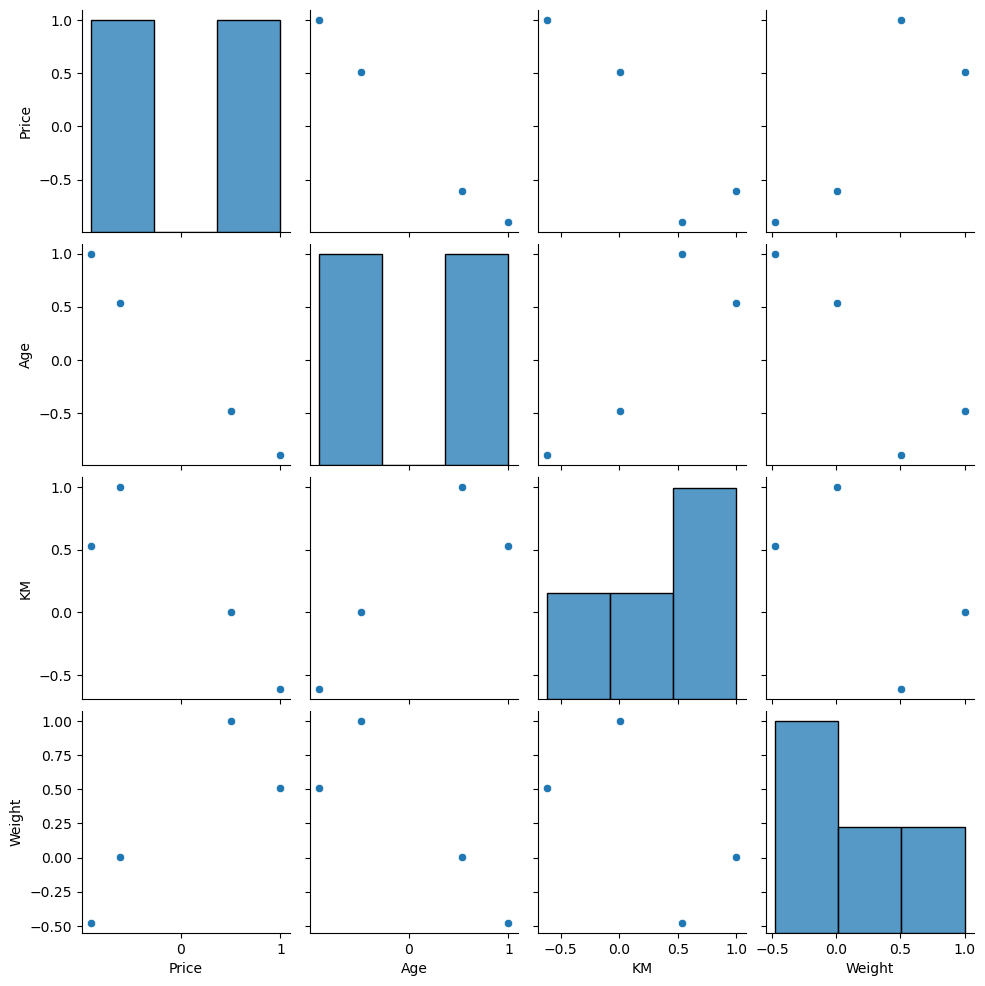

In [38]:
sns.pairplot(correlation)

In [39]:
correlation['Price'][abs(correlation['Price'])>0.5]

Price     1.000000
Age      -0.895387
KM       -0.611754
Weight    0.507669
Name: Price, dtype: float64

Selected Continuous Columns = **['Age','KM','Weight']**

### Statistical Feature Selection (Categorical Vs Continuous) using Anova Test

In [42]:
from scipy.stats import f_oneway

In [45]:
Categoricalcol = []

for i in numcol:
    if df[i].nunique()<=12:
        Categoricalcol.append(i)

In [46]:
Categoricalcol

['HP', 'MetColor', 'Automatic', 'CC', 'Doors']

In [56]:
CatPred = ['HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'FuelType']

SelectedPredictor = []

for i in CatPred:
    categorigroup = df.groupby(i)['Price'].apply(list)
    Anovaresult = f_oneway(*categorigroup)
    
    if Anovaresult[1]<0.05:
        print(i, 'is correlated with Price | P-Value: ', Anovaresult[1])
        SelectedPredictor.append(i)
    else:
        print(i, 'is not correlated with Price | P-Value: ', Anovaresult[1])
print()        
print('The selected columns are: ',SelectedPredictor)        

HP is correlated with Price | P-Value:  3.0334390442090337e-92
MetColor is correlated with Price | P-Value:  1.722496500887766e-05
Automatic is not correlated with Price | P-Value:  0.17456813078044978
CC is correlated with Price | P-Value:  1.616148165057604e-50
Doors is correlated with Price | P-Value:  5.087751763029103e-13
FuelType is not correlated with Price | P-Value:  0.3240449951733266

The selected columns are:  ['HP', 'MetColor', 'CC', 'Doors']


### OverAll Selected  Predicted Columns are as below

**['HP', 'MetColor', 'CC', 'Doors','Age','KM','Weight']**

In [61]:
PredictorCol = ['HP', 'MetColor', 'CC', 'Doors','Age','KM','Weight']
TargetVariable = ['Price']

In [64]:
DataForML = df[PredictorCol]

In [65]:
DataForML['Price']=df['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_14812\2568813088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Price']=df['Price']


In [68]:
DataForML.to_pickle('FinalData.pkl') ## Storing the data into pickle file

In [74]:
import pandas as pd
import numpy as np

df = pd.read_pickle('FinalData.pkl')## import pickle data

In [75]:
df.head()

,HP,MetColor,CC,Doors,Age,KM,Weight,Price
0,90,1,1900,3,23,46986,1152.5,13500.0
1,90,1,1900,3,23,72937,1152.5,13750.0
2,90,1,1900,3,24,41711,1152.5,13950.0
3,90,0,1900,3,26,48000,1152.5,14950.0
4,90,0,1900,3,30,38500,1152.5,13750.0


### ColumnTransformation for Skewed Column

In [76]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [82]:
trans = ColumnTransformer(transformers = [
    ('trans1', FunctionTransformer(func = np.square), ['Age']),
    ('trans2', FunctionTransformer(func = np.log1p), ['Weight']),
    ('trans3', PowerTransformer(method = "box-cox", standardize=True), ['KM'])
], remainder = 'passthrough')

In [83]:
pred = ['Age','Weight','KM', 'HP','MetColor','CC','Doors']

In [84]:
Target = ['Price']

In [85]:
X = df[pred]

In [86]:
X = trans.fit_transform(X)

In [93]:
y = df[Target]

### Standerdization & Normalization of the data

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [95]:
predictor = MinMaxScaler()

X = predictor.fit_transform(X)

In [96]:
X.shape

(1435, 7)

### Spliting the data into train and test

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1004, 7)
(431, 7)
(1004, 1)
(431, 1)


In [99]:
import warnings
warnings.filterwarnings('ignore')

## Checking the Accuracy score with all suitable model for Regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [101]:
model = {
    'LinearRegression':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(max_depth = 3, criterion = 'friedman_mse'),
    'RandomForest':RandomForestRegressor(max_depth = 3, n_estimators = 200, criterion = 'friedman_mse'),
    'Adaboost':AdaBoostRegressor(n_estimators = 200, base_estimator = DecisionTreeRegressor(max_depth = 3, criterion = 'friedman_mse'), learning_rate = 0.01),
    'XGBoost':XGBRegressor(max_depth = 3, n_estimators = 200, objective = 'reg:linear', booster = 'gbtree', learning_rate = 0.01),
    'KNN': KNeighborsRegressor(4)
        }

In [ ]:
pred = 

In [114]:
for i in model:
    print()
    print(i)
    print()
    clf = model[i].fit(X_train,y_train)
   
    prediction = clf.predict(X_test)
   
    from sklearn import metrics
    print('R2 value for {} model is {}'.format(i, metrics.r2_score(y_train, clf.predict(X_train))))
    
    TestData = pd.DataFrame(data = X_test, columns = pred)
    TestData['Price'] = y_train
    TestData['PredictedPrice'] = np.round(prediction,2)
    TestData['APE'] = 100*((abs(TestData['Price']-TestData['PredictedPrice']))/TestData['Price'])
    print(TestData[['Price','PredictedPrice', 'APE']].head())
    
    MAPE = np.mean(TestData['APE'])
    MedianAPE = np.median(TestData['APE'])
    
    Accuracy = 100-MAPE
    MedianAccuracy = 100-MedianAPE
    print('Mean Accuracy on test Data: ', Accuracy)
    print('Median Accuracy on test Data: ',MedianAccuracy)
    
    
    def Accuracy_score(orign, pred):
        MAPE = np.mean(100*(np.abs(orign-pred)/orign))
        return(100-MAPE)
    
    
    from sklearn.metrics import make_scorer
    custom_score = make_scorer(Accuracy_score, greater_is_better = True)
    print(custom_score)
    
    
    from sklearn.model_selection import cross_val_score
    
    Accuracy_score = cross_val_score(clf, X, y, cv = 10, scoring = custom_score)
    print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_score)
    print('\nFinal Average Accuracy of the model:', round(Accuracy_score.mean(),2))


LinearRegression

R2 value for LinearRegression model is 0.8480743863142797
     Price  PredictedPrice        APE
0  13500.0        10478.94  22.378222
1  13750.0        10363.71  24.627564
2  13950.0         9407.23  32.564659
3  14950.0         9556.40  36.077592
4  13750.0         9059.10  34.115636
Mean Accuracy on test Data:  70.20538274008803
Median Accuracy on test Data:  nan
make_scorer(Accuracy_score)

Accuracy values for 10-fold Cross Validation:
 [89.09057702 91.49740436 88.85381655 92.01082425 89.1652415  91.87228063
 90.87930459 88.53876649 90.12117435 88.35678056]

Final Average Accuracy of the model: 90.04

DecisionTree

R2 value for DecisionTree model is 0.8480507457028353
     Price  PredictedPrice        APE
0  13500.0         9323.48  30.937185
1  13750.0         9323.48  32.192873
2  13950.0         9323.48  33.165018
3  14950.0         7958.75  46.764214
4  13750.0         9323.48  32.192873
Mean Accuracy on test Data:  69.59711888975411
Median Accuracy on test Da

### Selected Model is Linear Regression

* Checking the Accuracy score for selected model with 100% data

In [117]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

LR = clf.fit(X,y)

def Accuracy_score(orgn,pred):
    MAPE = np.mean(100*(np.abs(orgn-pred)/orgn))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring = make_scorer(Accuracy_score, greater_is_better = True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LR, X , y, cv=10, scoring=custom_scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.09057702 91.49740436 88.85381655 92.01082425 89.1652415  91.87228063
 90.87930459 88.53876649 90.12117435 88.35678056]

Final Average Accuracy of the model: 90.04


### Creating a Pickle file 

In [118]:
import pickle
import os

with open('LR.pkl', 'wb') as filewritestream:
    pickle.dump(LR, filewritestream)
    filewritestream.close()

In [119]:
os.getcwd()

'C:\\Users\\DELL\\Untitled Folder 2'

# Model Deployment Function

In [151]:
def FunctionInput(InputData):
    
    import pandas as pd
    import numpy as np
    
    pred = ['Age','Weight','KM', 'HP','MetColor','CC','Doors']
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.preprocessing import PowerTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.compose import ColumnTransformer
    
    X = InputData[pred]
    
    trans1 = ColumnTransformer(transformers = [
    ('trans1', SimpleImputer(strategy = 'median'), ['Age']),
    ('trans2', SimpleImputer(strategy = 'median'), ['Weight']),
    ('trans3', SimpleImputer(strategy = 'median'), ['KM']),
    ('trans4', SimpleImputer(strategy = 'most_frequent'), ['HP']),
    ('trans5', SimpleImputer(strategy = 'most_frequent'), ['MetColor']),
    ('trans6', SimpleImputer(strategy = 'most_frequent'), ['CC']),   
    ('trans7', SimpleImputer(strategy = 'most_frequent'), ['Doors'])
    ], remainder = 'passthrough')
    
     
    X = trans1.fit_transform(X)
    
    P = pd.DataFrame(data = X, columns = ['Age','Weight','KM', 'HP','MetColor','CC','Doors'])
    
    trans = ColumnTransformer(transformers = [
    ('trans8', FunctionTransformer(func = np.square), ['Age']),
    ('trans9', FunctionTransformer(func = np.log1p), ['Weight']),
    ('trans10', PowerTransformer(method = "box-cox", standardize=True), ['KM'])
    ], remainder = 'passthrough')
    
    P = trans.fit_transform(P)
    
    from sklearn.preprocessing import MinMaxScaler
    predictor = MinMaxScaler()
    
    P = predictor.fit_transform(P)
    
    
    import pickle
    
    with open('LR.pkl', 'rb') as filereadstream:
        predictedmodel = pickle.load(filereadstream)
        filereadstream.close()
        
        
    prediction = predictedmodel.predict(P)
    PredictionResult = pd.DataFrame(prediction, columns = ['Prediction'])
    return(round(PredictionResult))

In [122]:
pred = ['Age','Weight','KM', 'HP','MetColor','CC','Doors']

In [152]:
NewData = pd.DataFrame(
data = [[37, np.nan, 20000, 200, 1, 3000, 4],
       [50, 2255.0, 40000, np.nan, 0, np.nan, 4]],
columns = pred)

In [154]:
NewData

,Age,Weight,KM,HP,MetColor,CC,Doors
0,37,NaN,20000,200.0,1,3000.0,4
1,50,2255.0,40000,NaN,0,NaN,4


In [155]:
NewPredicted = FunctionInput(InputData=NewData)

In [156]:
NewData['PredictedResult'] = NewPredicted

NewData

,Age,Weight,KM,HP,MetColor,CC,Doors,PredictedResult
0,37,NaN,20000,200.0,1,3000.0,4,13912.0
1,50,2255.0,40000,NaN,0,NaN,4,4268.0


In [157]:
NewData.to_csv('Project_Deployment_Regression.csv')